In [55]:
!conda info


     active environment : base
    active env location : /opt/anaconda3/envs/py39
            shell level : 2
       user config file : /Users/marcelo_palermo/.condarc
 populated config files : /Users/marcelo_palermo/.condarc
          conda version : 4.13.0
    conda-build version : not installed
         python version : 3.9.13.final.0
       virtual packages : __osx=12.4=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /opt/anaconda3/envs/py39  (writable)
      conda av data dir : /opt/anaconda3/envs/py39/etc/conda
  conda av metadata url : None
           channel URLs : https://conda.anaconda.org/conda-forge/osx-64
                          https://conda.anaconda.org/conda-forge/noarch
                          https://repo.anaconda.com/pkgs/main/osx-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-64
                          https://

In [56]:
from sklearn import preprocessing
from sklearn import inspection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

In [57]:
data = pd.read_csv("anova_ML_Training_class.csv")
data = data[(data["class"] == 'male') | (data["class"] == 'female')]

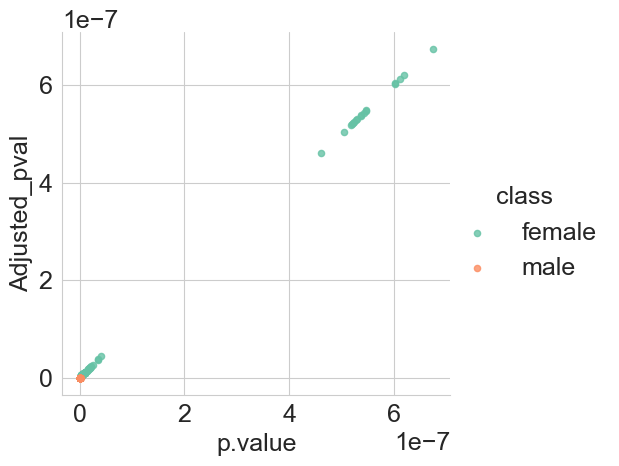

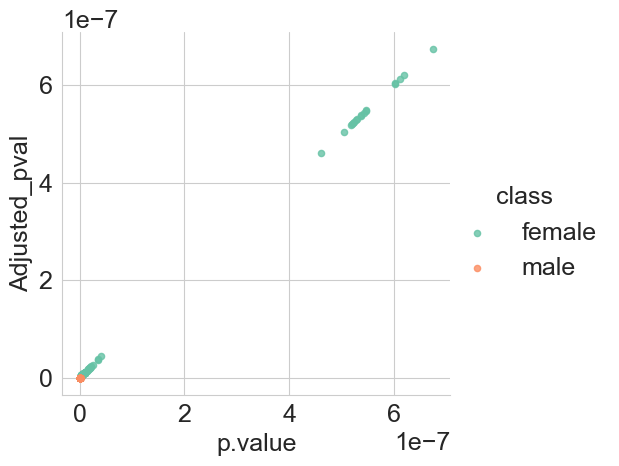

<Figure size 10000x800 with 0 Axes>

<Figure size 10000x800 with 0 Axes>

In [58]:
sns.lmplot(x='p.value',y='Adjusted_pval', data=data,hue='class', palette='Set2',fit_reg=False, scatter_kws={"s": 20})
plt.figure(figsize=(100,8), dpi= 100, facecolor='w', edgecolor='k')
plt.show()

In [59]:
data.head()

,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,class,type
37,38,CCL8,OID05130,P80075,Olink COVID,Time,1,35.781918,35.781918,80.765124,2.891486e-10,9.638287e-10,Significant,female,Simulated
38,39,CCL8,OID05130,P80075,Olink COVID,Time,1,36.599374,36.599374,82.678306,2.202410e-10,7.341368e-10,Significant,female,Simulated
39,40,CCL8,OID05130,P80075,Olink COVID,Time,1,37.889321,37.889321,92.413087,5.898740e-11,1.966247e-10,Significant,female,Simulated
40,41,CCL8,OID05130,P80075,Olink COVID,Time,1,37.994845,37.994845,88.513480,9.869771e-11,3.289924e-10,Significant,female,Simulated
41,42,CCL8,OID05130,P80075,Olink COVID,Time,1,39.153029,39.153029,91.074133,7.025952e-11,2.341984e-10,Significant,female,Simulated


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,class,type
37,38,CCL8,OID05130,P80075,Olink COVID,Time,1,35.781918,35.781918,80.765124,2.891486e-10,9.638287e-10,Significant,female,Simulated
38,39,CCL8,OID05130,P80075,Olink COVID,Time,1,36.599374,36.599374,82.678306,2.202410e-10,7.341368e-10,Significant,female,Simulated
39,40,CCL8,OID05130,P80075,Olink COVID,Time,1,37.889321,37.889321,92.413087,5.898740e-11,1.966247e-10,Significant,female,Simulated
40,41,CCL8,OID05130,P80075,Olink COVID,Time,1,37.994845,37.994845,88.513480,9.869771e-11,3.289924e-10,Significant,female,Simulated
41,42,CCL8,OID05130,P80075,Olink COVID,Time,1,39.153029,39.153029,91.074133,7.025952e-11,2.341984e-10,Significant,female,Simulated


In [60]:
data.shape

(360, 15)

(360, 15)

In [61]:
data

,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,class,type
37,38,CCL8,OID05130,P80075,Olink COVID,Time,1,35.781918,35.781918,80.765124,2.891486e-10,9.638287e-10,Significant,female,Simulated
38,39,CCL8,OID05130,P80075,Olink COVID,Time,1,36.599374,36.599374,82.678306,2.202410e-10,7.341368e-10,Significant,female,Simulated
39,40,CCL8,OID05130,P80075,Olink COVID,Time,1,37.889321,37.889321,92.413087,5.898740e-11,1.966247e-10,Significant,female,Simulated
40,41,CCL8,OID05130,P80075,Olink COVID,Time,1,37.994845,37.994845,88.513480,9.869771e-11,3.289924e-10,Significant,female,Simulated
41,42,CCL8,OID05130,P80075,Olink COVID,Time,1,39.153029,39.153029,91.074133,7.025952e-11,2.341984e-10,Significant,female,Simulated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1041,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,25.643903,25.643903,80.298780,6.617361e-13,1.654340e-12,Significant,male,Simulated
1041,1042,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.168600,26.168600,81.552815,5.000585e-13,1.250146e-12,Significant,male,Simulated
1042,1043,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.519729,26.519729,81.758200,4.777456e-13,1.194364e-12,Significant,male,Simulated
1043,1044,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.562667,26.562667,80.204061,6.759555e-13,1.689889e-12,Significant,male,Simulated


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,class,type
37,38,CCL8,OID05130,P80075,Olink COVID,Time,1,35.781918,35.781918,80.765124,2.891486e-10,9.638287e-10,Significant,female,Simulated
38,39,CCL8,OID05130,P80075,Olink COVID,Time,1,36.599374,36.599374,82.678306,2.202410e-10,7.341368e-10,Significant,female,Simulated
39,40,CCL8,OID05130,P80075,Olink COVID,Time,1,37.889321,37.889321,92.413087,5.898740e-11,1.966247e-10,Significant,female,Simulated
40,41,CCL8,OID05130,P80075,Olink COVID,Time,1,37.994845,37.994845,88.513480,9.869771e-11,3.289924e-10,Significant,female,Simulated
41,42,CCL8,OID05130,P80075,Olink COVID,Time,1,39.153029,39.153029,91.074133,7.025952e-11,2.341984e-10,Significant,female,Simulated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1041,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,25.643903,25.643903,80.298780,6.617361e-13,1.654340e-12,Significant,male,Simulated
1041,1042,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.168600,26.168600,81.552815,5.000585e-13,1.250146e-12,Significant,male,Simulated
1042,1043,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.519729,26.519729,81.758200,4.777456e-13,1.194364e-12,Significant,male,Simulated
1043,1044,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.562667,26.562667,80.204061,6.759555e-13,1.689889e-12,Significant,male,Simulated


In [62]:
data.shape

(360, 15)

(360, 15)

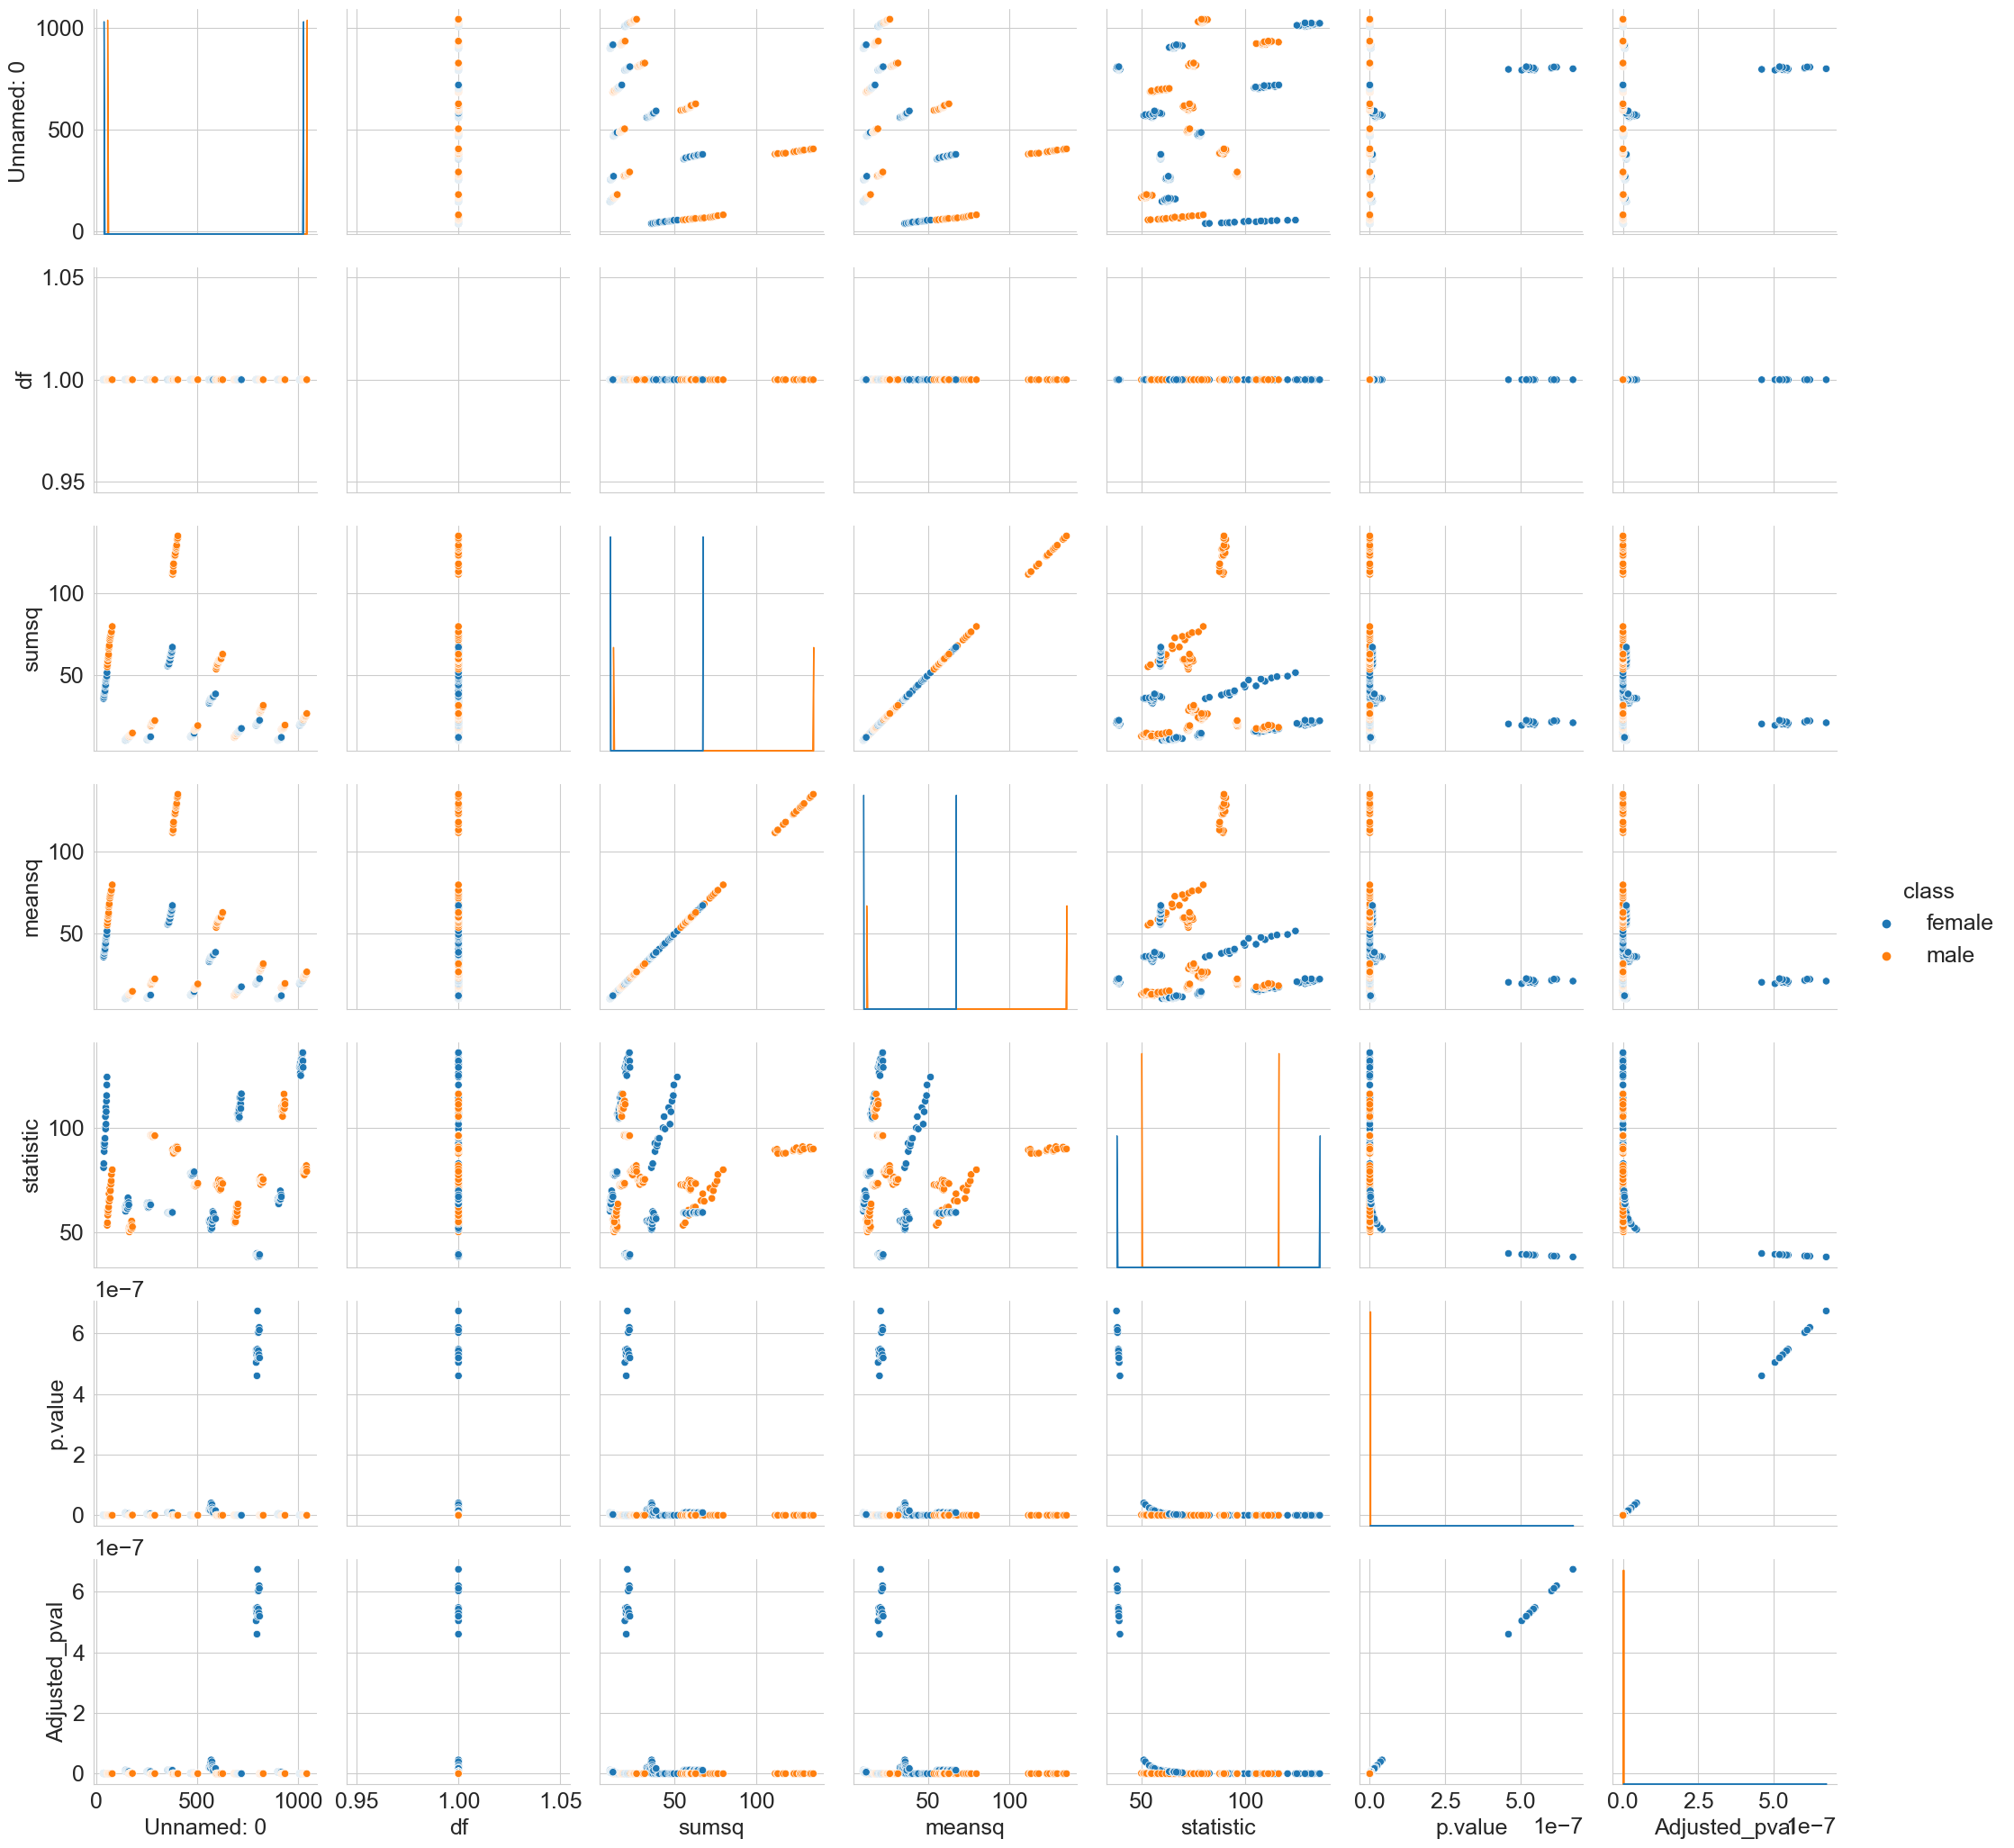

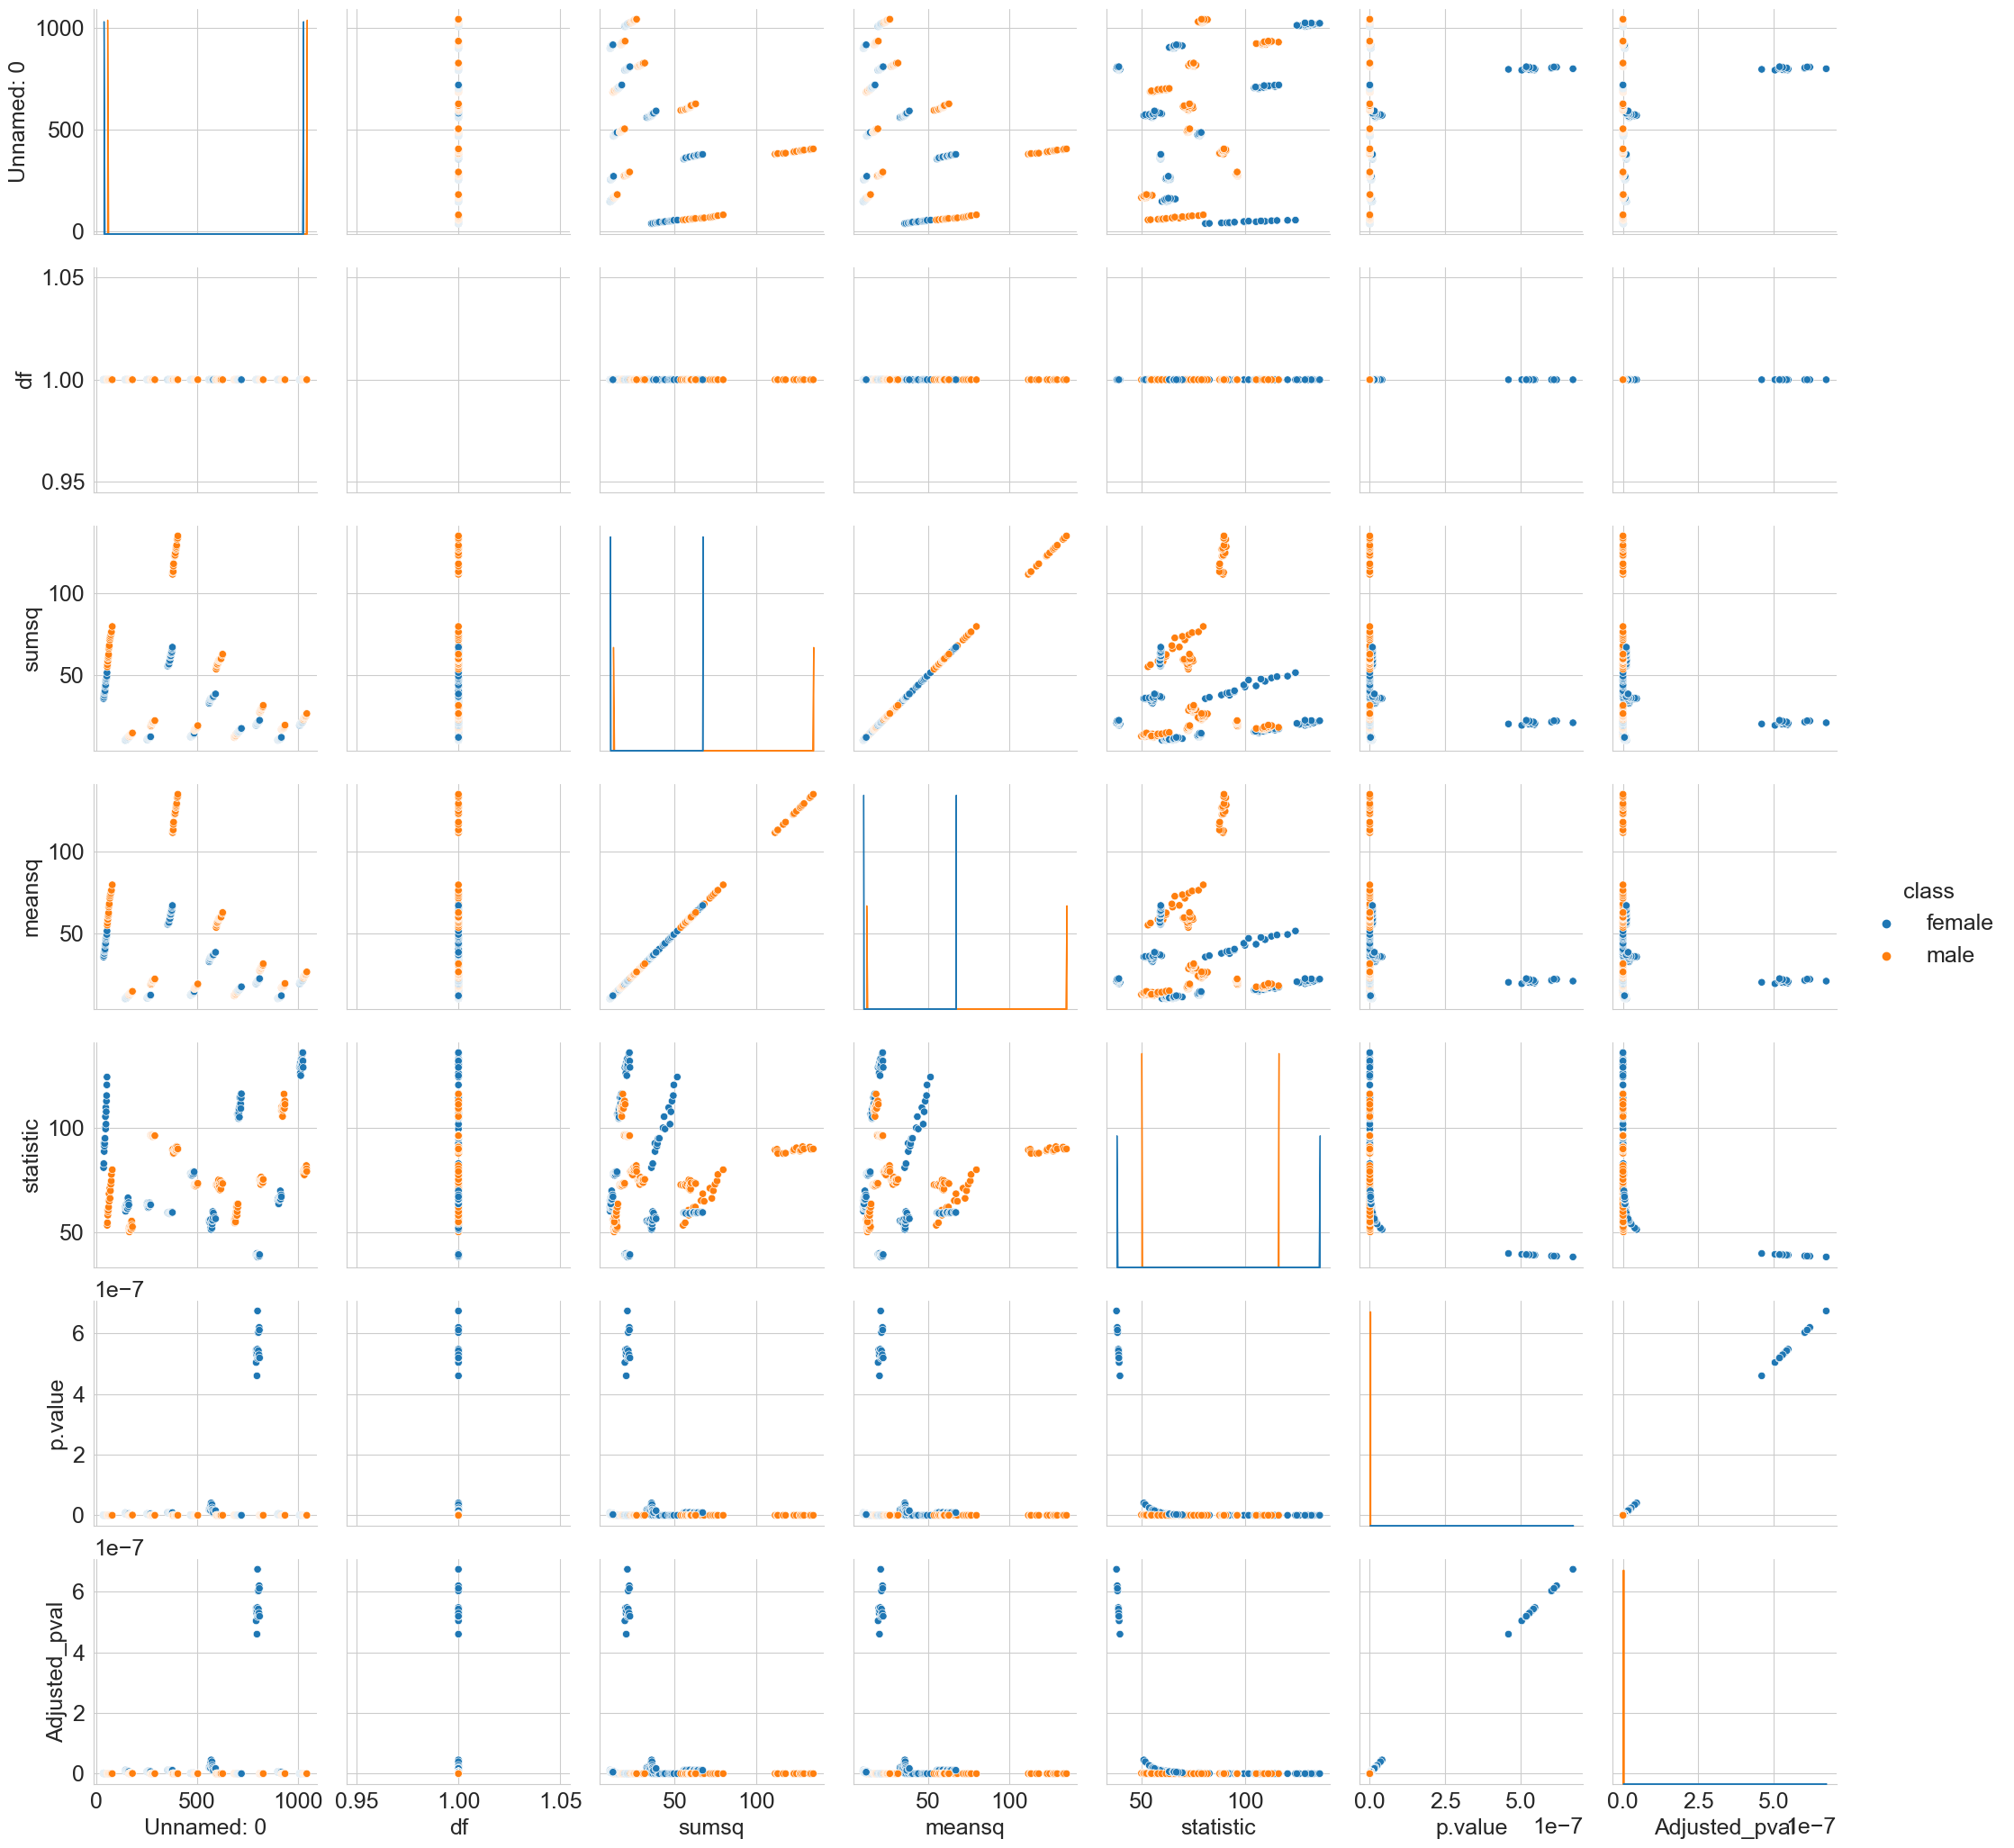

In [63]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="class", height=3, diag_kws={'bw_adjust': 1e-7});
plt.show()

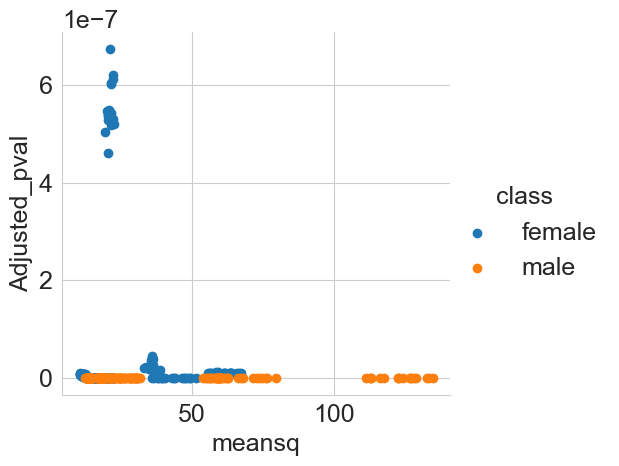

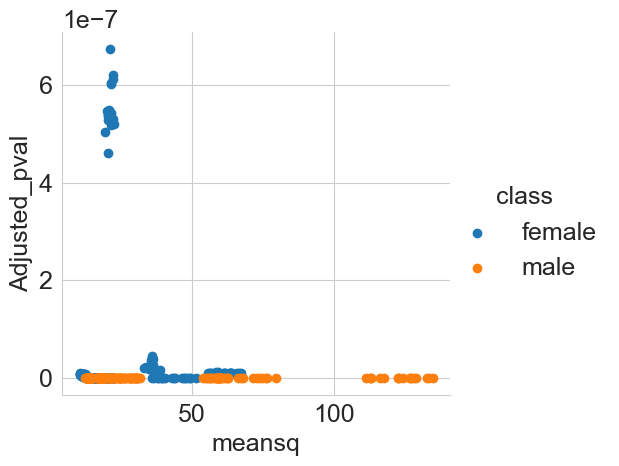

In [64]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue='class', height=5) \
.map(plt.scatter, "meansq", "Adjusted_pval") \
.add_legend();
plt.show()

In [65]:
data.insert(2, "Protein_name", data.Assay.values)
data.insert(12,"Class_name", data['class'].values)

#data.insert(14,"class names", data.Classif.values)

In [66]:
data

,Unnamed: 0,Assay,Protein_name,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Class_name,Adjusted_pval,Threshold,class,type
37,38,CCL8,CCL8,OID05130,P80075,Olink COVID,Time,1,35.781918,35.781918,80.765124,2.891486e-10,female,9.638287e-10,Significant,female,Simulated
38,39,CCL8,CCL8,OID05130,P80075,Olink COVID,Time,1,36.599374,36.599374,82.678306,2.202410e-10,female,7.341368e-10,Significant,female,Simulated
39,40,CCL8,CCL8,OID05130,P80075,Olink COVID,Time,1,37.889321,37.889321,92.413087,5.898740e-11,female,1.966247e-10,Significant,female,Simulated
40,41,CCL8,CCL8,OID05130,P80075,Olink COVID,Time,1,37.994845,37.994845,88.513480,9.869771e-11,female,3.289924e-10,Significant,female,Simulated
41,42,CCL8,CCL8,OID05130,P80075,Olink COVID,Time,1,39.153029,39.153029,91.074133,7.025952e-11,female,2.341984e-10,Significant,female,Simulated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1041,SIGLEC1,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,25.643903,25.643903,80.298780,6.617361e-13,male,1.654340e-12,Significant,male,Simulated
1041,1042,SIGLEC1,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.168600,26.168600,81.552815,5.000585e-13,male,1.250146e-12,Significant,male,Simulated
1042,1043,SIGLEC1,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.519729,26.519729,81.758200,4.777456e-13,male,1.194364e-12,Significant,male,Simulated
1043,1044,SIGLEC1,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.562667,26.562667,80.204061,6.759555e-13,male,1.689889e-12,Significant,male,Simulated


,Unnamed: 0,Assay,Protein_name,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Class_name,Adjusted_pval,Threshold,class,type
37,38,CCL8,CCL8,OID05130,P80075,Olink COVID,Time,1,35.781918,35.781918,80.765124,2.891486e-10,female,9.638287e-10,Significant,female,Simulated
38,39,CCL8,CCL8,OID05130,P80075,Olink COVID,Time,1,36.599374,36.599374,82.678306,2.202410e-10,female,7.341368e-10,Significant,female,Simulated
39,40,CCL8,CCL8,OID05130,P80075,Olink COVID,Time,1,37.889321,37.889321,92.413087,5.898740e-11,female,1.966247e-10,Significant,female,Simulated
40,41,CCL8,CCL8,OID05130,P80075,Olink COVID,Time,1,37.994845,37.994845,88.513480,9.869771e-11,female,3.289924e-10,Significant,female,Simulated
41,42,CCL8,CCL8,OID05130,P80075,Olink COVID,Time,1,39.153029,39.153029,91.074133,7.025952e-11,female,2.341984e-10,Significant,female,Simulated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1041,SIGLEC1,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,25.643903,25.643903,80.298780,6.617361e-13,male,1.654340e-12,Significant,male,Simulated
1041,1042,SIGLEC1,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.168600,26.168600,81.552815,5.000585e-13,male,1.250146e-12,Significant,male,Simulated
1042,1043,SIGLEC1,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.519729,26.519729,81.758200,4.777456e-13,male,1.194364e-12,Significant,male,Simulated
1043,1044,SIGLEC1,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.562667,26.562667,80.204061,6.759555e-13,male,1.689889e-12,Significant,male,Simulated


In [67]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.Assay.unique())

le.transform(data.Assay.unique())
data['Assay'] = le.fit_transform(data.Assay.values)

le.fit(data.Class_name.unique())
data['Class_name'] = le.fit_transform(data.Class_name.values)
data

,Unnamed: 0,Assay,Protein_name,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Class_name,Adjusted_pval,Threshold,class,type
37,38,0,CCL8,OID05130,P80075,Olink COVID,Time,1,35.781918,35.781918,80.765124,2.891486e-10,0,9.638287e-10,Significant,female,Simulated
38,39,0,CCL8,OID05130,P80075,Olink COVID,Time,1,36.599374,36.599374,82.678306,2.202410e-10,0,7.341368e-10,Significant,female,Simulated
39,40,0,CCL8,OID05130,P80075,Olink COVID,Time,1,37.889321,37.889321,92.413087,5.898740e-11,0,1.966247e-10,Significant,female,Simulated
40,41,0,CCL8,OID05130,P80075,Olink COVID,Time,1,37.994845,37.994845,88.513480,9.869771e-11,0,3.289924e-10,Significant,female,Simulated
41,42,0,CCL8,OID05130,P80075,Olink COVID,Time,1,39.153029,39.153029,91.074133,7.025952e-11,0,2.341984e-10,Significant,female,Simulated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1041,9,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,25.643903,25.643903,80.298780,6.617361e-13,1,1.654340e-12,Significant,male,Simulated
1041,1042,9,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.168600,26.168600,81.552815,5.000585e-13,1,1.250146e-12,Significant,male,Simulated
1042,1043,9,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.519729,26.519729,81.758200,4.777456e-13,1,1.194364e-12,Significant,male,Simulated
1043,1044,9,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.562667,26.562667,80.204061,6.759555e-13,1,1.689889e-12,Significant,male,Simulated


,Unnamed: 0,Assay,Protein_name,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Class_name,Adjusted_pval,Threshold,class,type
37,38,0,CCL8,OID05130,P80075,Olink COVID,Time,1,35.781918,35.781918,80.765124,2.891486e-10,0,9.638287e-10,Significant,female,Simulated
38,39,0,CCL8,OID05130,P80075,Olink COVID,Time,1,36.599374,36.599374,82.678306,2.202410e-10,0,7.341368e-10,Significant,female,Simulated
39,40,0,CCL8,OID05130,P80075,Olink COVID,Time,1,37.889321,37.889321,92.413087,5.898740e-11,0,1.966247e-10,Significant,female,Simulated
40,41,0,CCL8,OID05130,P80075,Olink COVID,Time,1,37.994845,37.994845,88.513480,9.869771e-11,0,3.289924e-10,Significant,female,Simulated
41,42,0,CCL8,OID05130,P80075,Olink COVID,Time,1,39.153029,39.153029,91.074133,7.025952e-11,0,2.341984e-10,Significant,female,Simulated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1041,9,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,25.643903,25.643903,80.298780,6.617361e-13,1,1.654340e-12,Significant,male,Simulated
1041,1042,9,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.168600,26.168600,81.552815,5.000585e-13,1,1.250146e-12,Significant,male,Simulated
1042,1043,9,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.519729,26.519729,81.758200,4.777456e-13,1,1.194364e-12,Significant,male,Simulated
1043,1044,9,SIGLEC1,OID06168,Q9BZZ2,Olink COVID,Time,1,26.562667,26.562667,80.204061,6.759555e-13,1,1.689889e-12,Significant,male,Simulated


In [68]:
y = data['class'].values

In [69]:
x = data[['Assay', 'Adjusted_pval']]

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
#---holds the cv (cross-validates) scores---
cv_scores = []
#---use all features---
x = data[['Assay', 'Adjusted_pval']].values
y = data['class'].values

from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()
scaler.fit(x)

x = scaler.transform(x)


#---number of folds---
folds = 10
#---creating odd list of K for KNN---
ks = list(range(1,int(len(x) * ((folds - 1)/folds))))
#---remove all multiples of 3---
ks = [k for k in ks] # if k % 3 != 0]
#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    #---performs cross-validation and returns the average accuracy---
    scores = cross_val_score(knn, x, y, cv=folds, scoring='accuracy')
    mean = scores.mean()
    cv_scores.append(mean)
    print(k, mean)
    

1 0.7583333333333334
2 0.7555555555555555
3 0.763888888888889
4 0.75
5 0.7444444444444445
6 0.75
7 0.75
8 0.75
9 0.75
10 0.75
11 0.75
12 0.75
13 0.75
14 0.75
1 0.7583333333333334
2 0.7555555555555555
3 0.763888888888889
4 0.75
5 0.7444444444444445
6 0.75
7 0.75
8 0.75
9 0.75
10 0.75
11 0.75
12 0.75
13 0.75
14 0.75
15 0.75
16 0.75
17 0.75
18 0.75
19 0.75
20 0.75
21 0.75
22 0.75
23 0.75
24 0.75
25 0.75
26 0.75
27 0.75
28 0.75
29 0.75
15 0.75
16 0.75
17 0.75
18 0.75
19 0.75
20 0.75
21 0.75
22 0.75
23 0.75
24 0.75
25 0.75
26 0.75
27 0.75
28 0.75
29 0.75
30 0.75
31 0.75
32 0.75
33 0.7555555555555555
34 0.7555555555555555
35 0.7555555555555555
36 0.7555555555555555
37 0.775
38 0.775
39 0.7666666666666667
40 0.7666666666666667
41 0.75
42 0.75
43 0.75
30 0.75
31 0.75
32 0.75
33 0.7555555555555555
34 0.7555555555555555
35 0.7555555555555555
36 0.7555555555555555
37 0.775
38 0.775
39 0.7666666666666667
40 0.7666666666666667
41 0.75
42 0.75
43 0.75
44 0.75
45 0.75
46 0.75
47 0.75
48 0.75
49 0.75


253 0.5555555555555556
254 0.5611111111111111
255 0.5583333333333333
256 0.5972222222222222
257 0.5666666666666667
258 0.5666666666666667
259 0.5583333333333333
260 0.5583333333333333
261 0.5583333333333333
262 0.5583333333333333
263 0.5555555555555556
264 0.5555555555555556
265 0.55
266 0.55
267 0.55
268 0.55
269 0.55
261 0.5583333333333333
262 0.5583333333333333
263 0.5555555555555556
264 0.5555555555555556
265 0.55
266 0.55
267 0.55
268 0.55
269 0.55
270 0.55
271 0.55
272 0.55
273 0.55
274 0.55
275 0.55
276 0.55
277 0.55
270 0.55
271 0.55
272 0.55
273 0.55
274 0.55
275 0.55
276 0.55
277 0.55
278 0.55
279 0.55
280 0.55
281 0.55
282 0.55
283 0.55
284 0.55
278 0.55
279 0.55
280 0.55
281 0.55
282 0.55
283 0.55
284 0.55
285 0.55
286 0.55
287 0.55
288 0.55
289 0.55
290 0.55
291 0.55
285 0.55
286 0.55
287 0.55
288 0.55
289 0.55
290 0.55
291 0.55
292 0.55
293 0.55
294 0.55
295 0.55
296 0.55
297 0.55
298 0.55
299 0.55
292 0.55
293 0.55
294 0.55
295 0.55
296 0.55
297 0.55
298 0.55
299 0.55
30

The optimal number of neighbors is 37
The optimal number of neighbors is 37


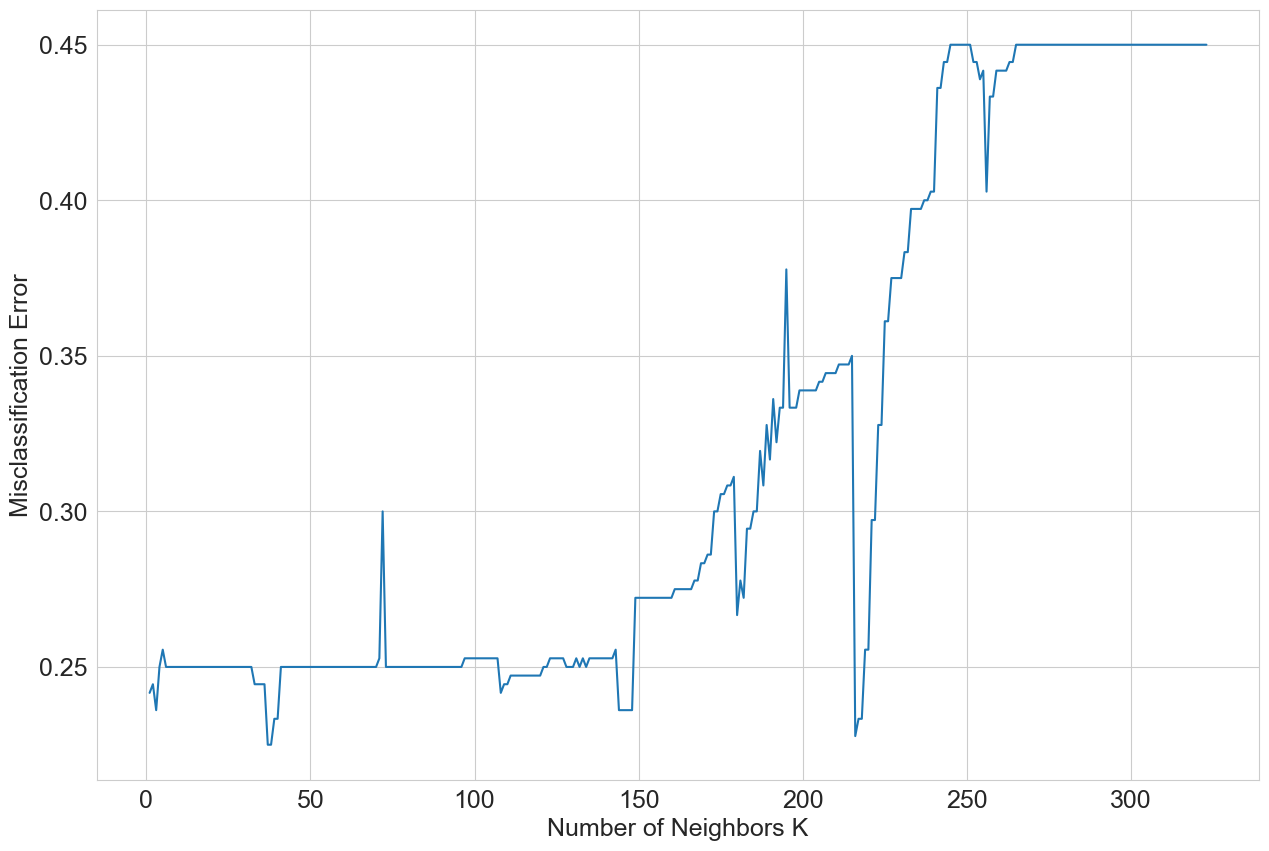

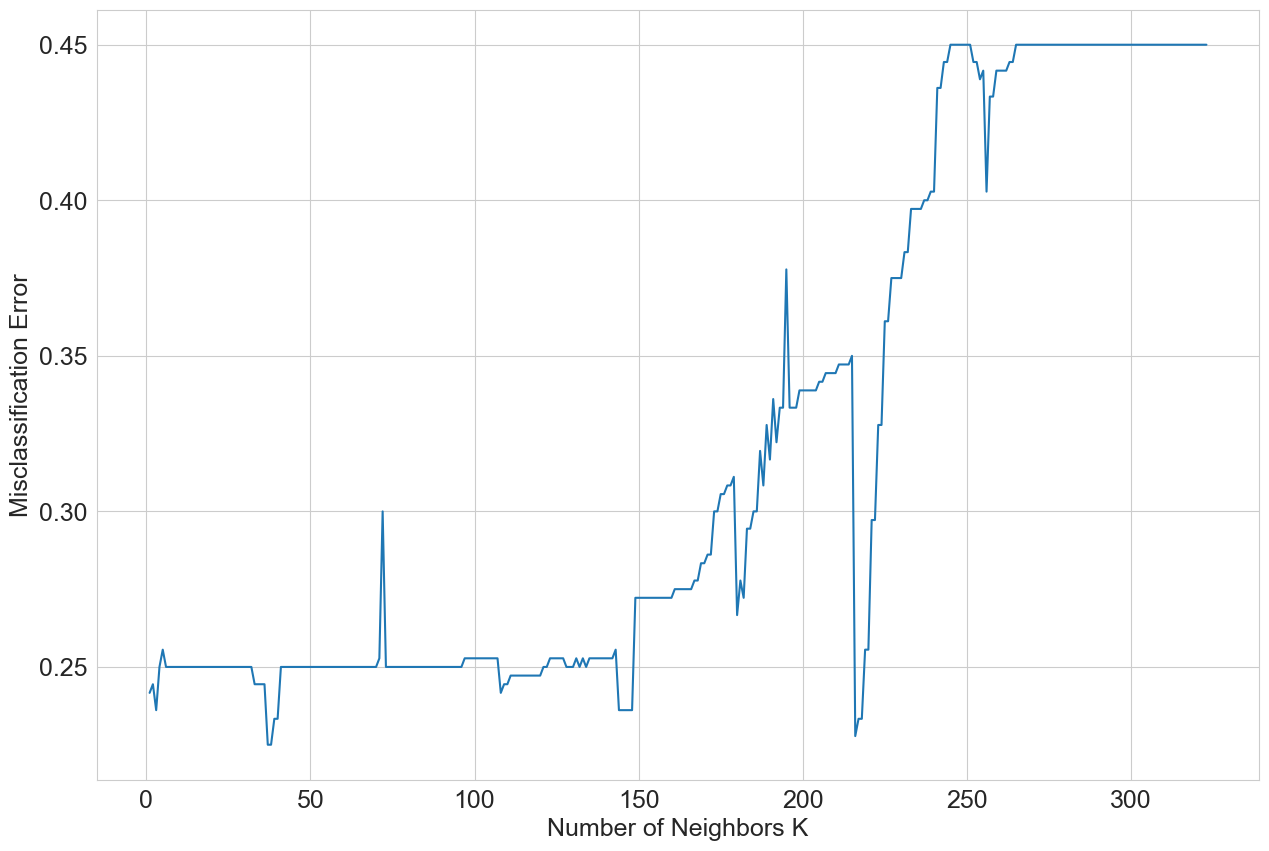

In [71]:
#---calculate misclassification error for each k---
MSE = [1 - x for x in cv_scores]

#---determining best k (min. MSE)---
optimal_k = ks[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")

#---plot misclassification error vs k---
plt.plot(ks, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=2)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, log_loss

from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


knn=KNeighborsClassifier(optimal_k)
knn.fit(x_train, y_train)
ypred=knn.predict(x_test) #These are the predicted output values
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print(result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)



Confusion Matrix:
[[17 18]
 [ 0 37]]
Classification Report:
              precision    recall  f1-score   support

      female       1.00      0.49      0.65        35
        male       0.67      1.00      0.80        37

    accuracy                           0.75        72
   macro avg       0.84      0.74      0.73        72
weighted avg       0.83      0.75      0.73        72

Accuracy: 0.75
Confusion Matrix:
[[17 18]
 [ 0 37]]
Classification Report:
              precision    recall  f1-score   support

      female       1.00      0.49      0.65        35
        male       0.67      1.00      0.80        37

    accuracy                           0.75        72
   macro avg       0.84      0.74      0.73        72
weighted avg       0.83      0.75      0.73        72

Accuracy: 0.75


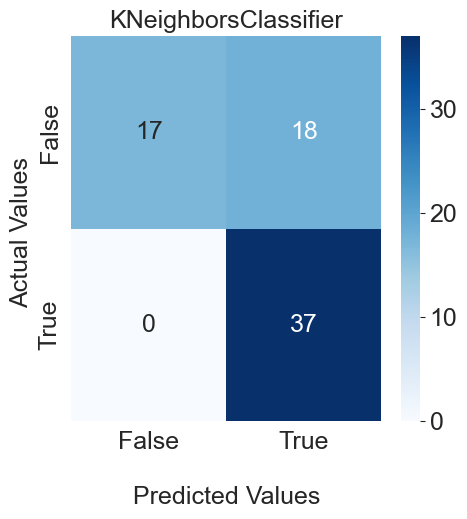

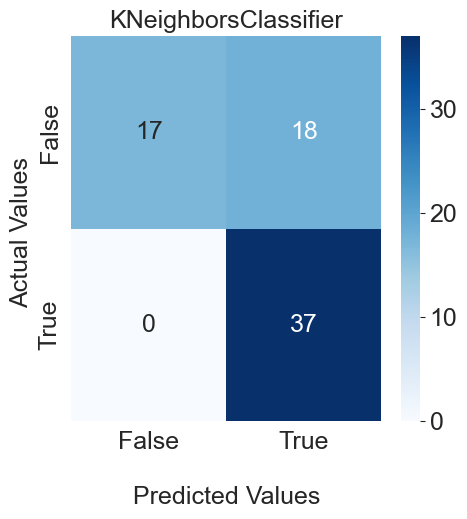

In [73]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.rcParams.update({'font.size': 18})

ax = sns.heatmap(result, annot=True, cmap='Blues',ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title(knn.__class__.__name__,fontsize=18);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

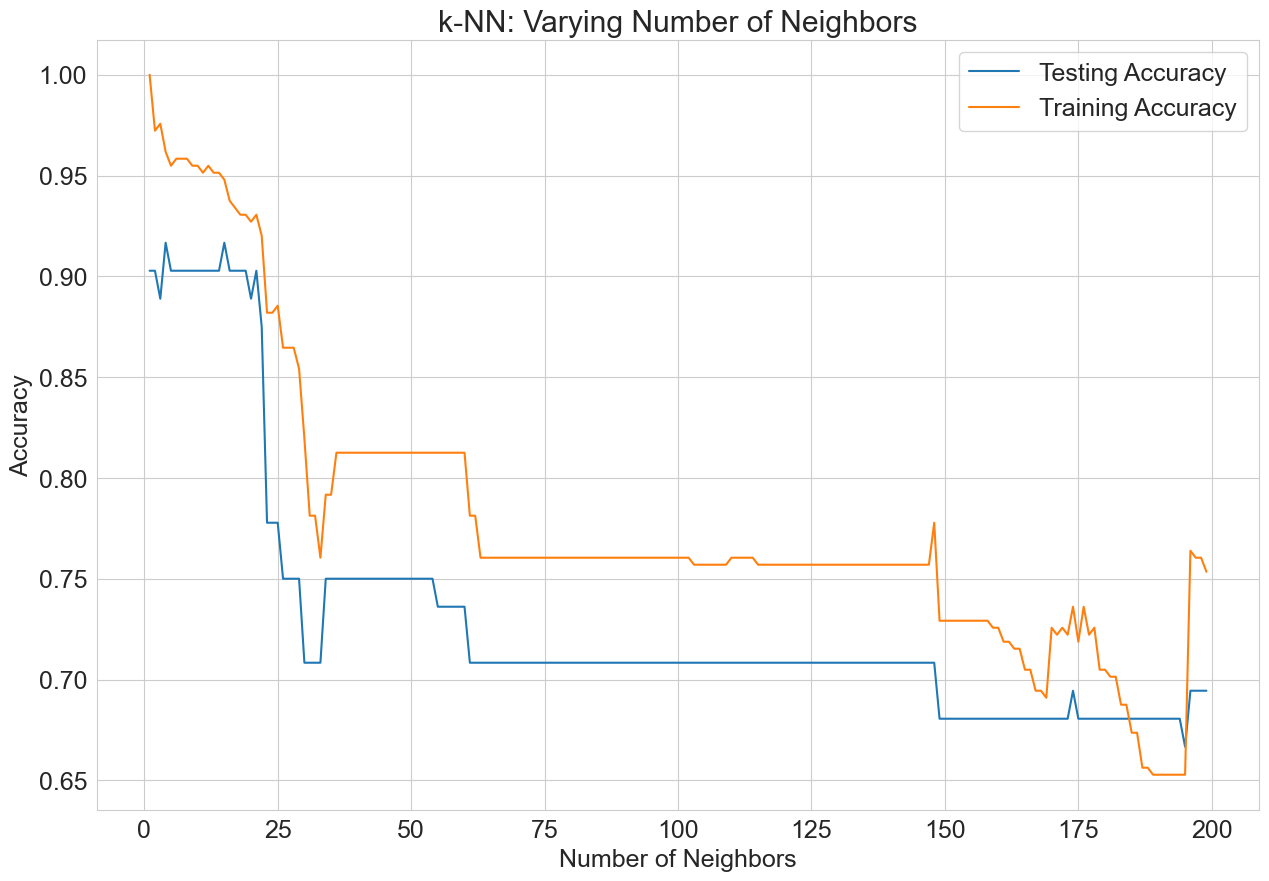

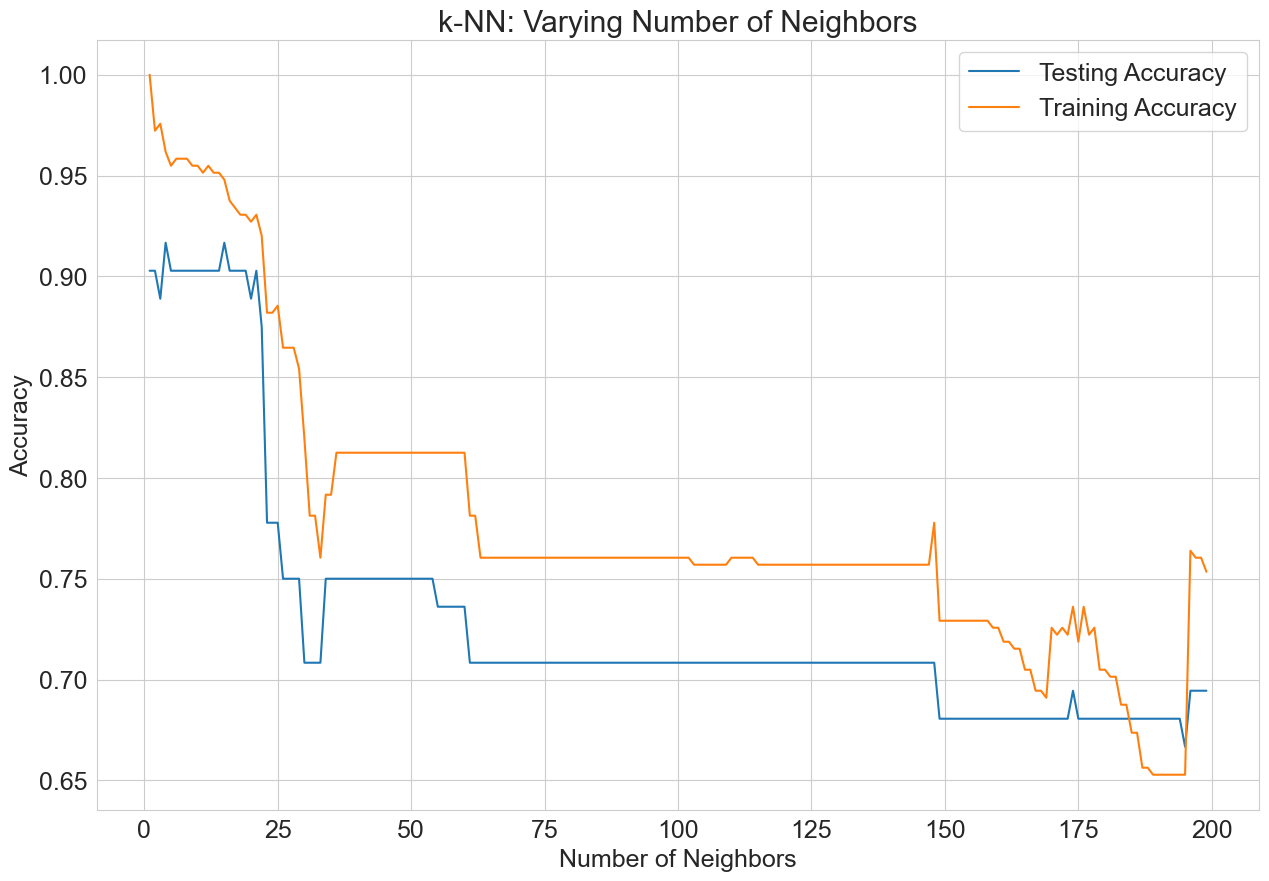

In [74]:
no_neighbors = np.arange(1, 200)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(x_train,y_train)
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    #print(train_accuracy[i])
    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)
    #print(test_accuracy[i])

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### https://askdatascience.com/777/score-vs-accuracyscore-in-sklearn

In [75]:
#Transformar para ROC e AUC funcionarem
y_test_roc = y_test
y_test_roc = np.where(y_test == 'male', 1, y_test_roc)
y_test_roc = np.where(y_test == 'female', -1, y_test_roc)
y_test_roc = y_test_roc.astype(int)

In [76]:
from sklearn.metrics import roc_curve, auc
#---find the predicted probabilities using the test set
probs = knn.predict_proba(x_test)
preds = probs[:,1]
#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(y_test_roc, preds)

ll = log_loss(y_test_roc, probs)
print("Log Loss: {}".format(ll))

Log Loss: 0.6138414915275621
Log Loss: 0.6138414915275621


In [77]:
print("FPR:",fpr)
print("TPR:",tpr)
print("THRESHOLD",threshold)

FPR: [0.         0.         0.         0.         0.02857143 0.08571429
 0.08571429 0.08571429 0.17142857 0.37142857 0.51428571 0.54285714
 0.6        0.62857143 0.68571429 0.74285714 0.8        0.88571429
 0.94285714 1.        ]
TPR: [0.         0.10810811 0.16216216 0.37837838 0.37837838 0.43243243
 0.51351351 0.54054054 0.62162162 0.67567568 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
THRESHOLD [1.71859296 0.71859296 0.70854271 0.69346734 0.68844221 0.68341709
 0.67839196 0.67336683 0.65326633 0.64321608 0.63819095 0.63316583
 0.51758794 0.51256281 0.49246231 0.48241206 0.47236181 0.46231156
 0.30653266 0.29648241]
FPR: [0.         0.         0.         0.         0.02857143 0.08571429
 0.08571429 0.08571429 0.17142857 0.37142857 0.51428571 0.54285714
 0.6        0.62857143 0.68571429 0.74285714 0.8        0.88571429
 0.94285714 1.        ]
TPR: [0.         0.10810811 0.16216216 0.37837838 0.37837838 0.43243243
 0.51351351 0.54054

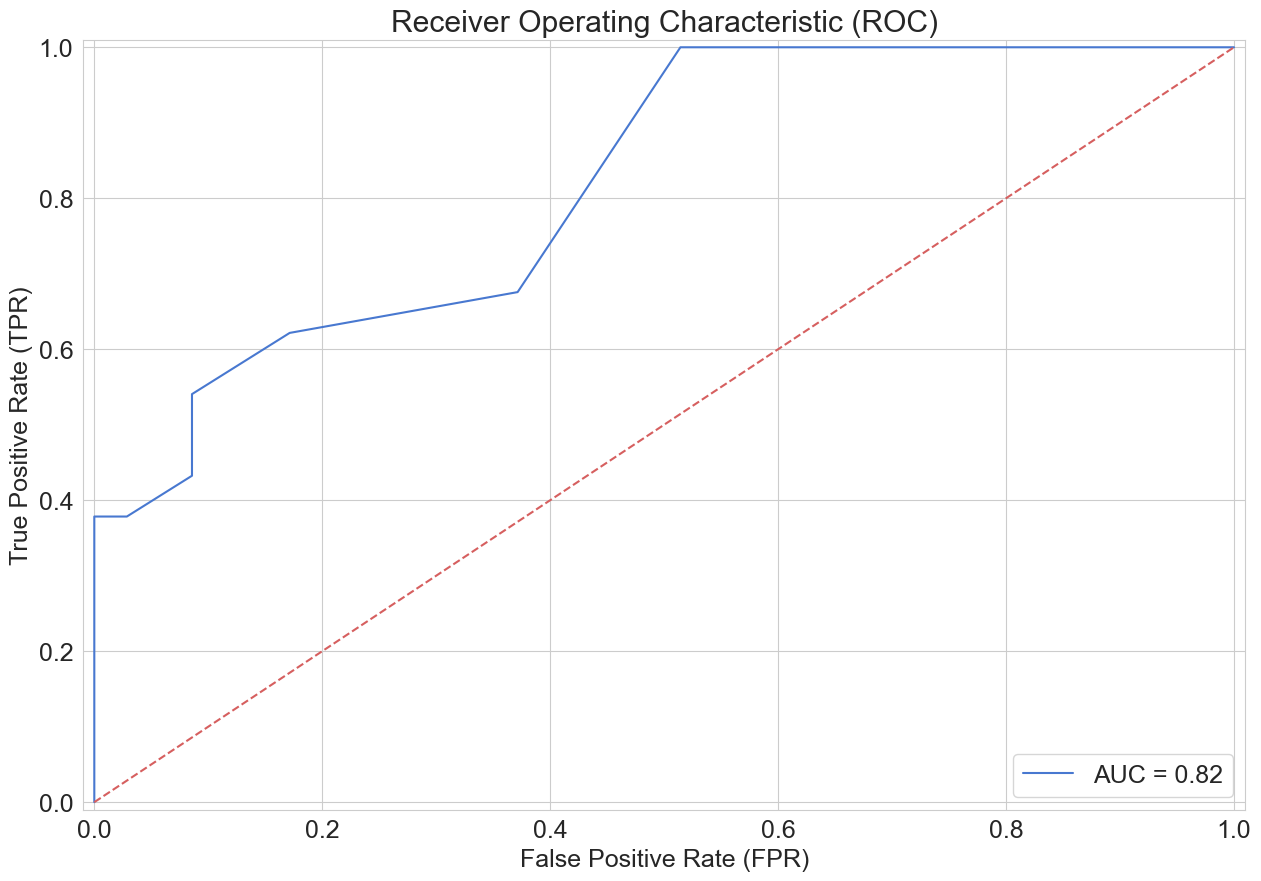

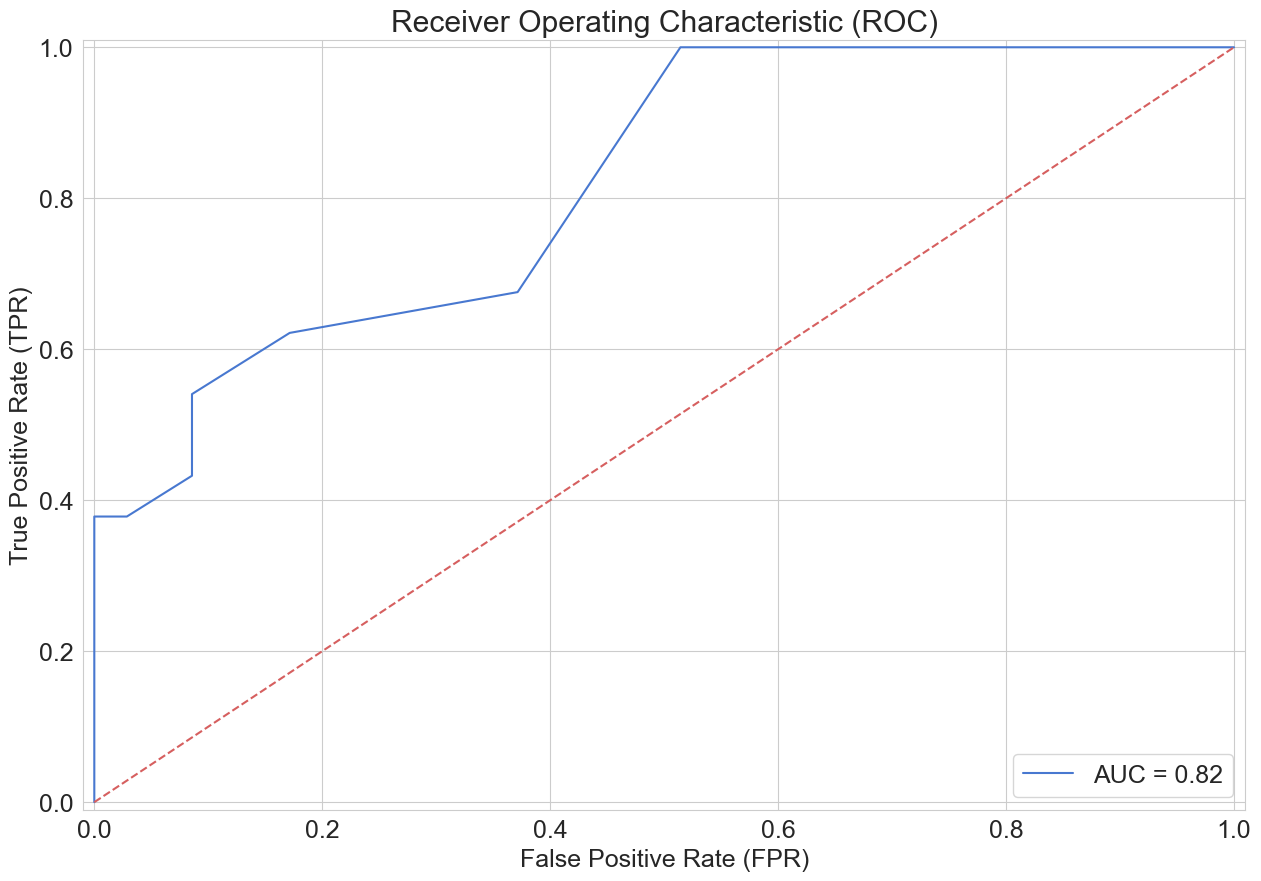

In [78]:
#---find the area under the curve---
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

In [79]:
#import sys
#!{sys.executable} -m pip install plotly
import plotly.express as px

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
#fig.show()

### Probability Estimates with go.Contour: <i>import plotly.graph_objects as go</i>
Just like the previous example, we will first train our kNN model on the training set.

Instead of predicting the conference for the test set, we can predict the confidence map for the entire area that wraps around the dimensions of our dataset. To do this, we use np.meshgrid to create a grid, where the distance between each point is denoted by the mesh_size variable.

Then, for each of those points, we will use our model to give a confidence score, and plot it with a contour plot.
In this example, we will use graph objects, Plotly's low-level API for building figures.

In [80]:
# Create a mesh grid on which we will run our model
import plotly.graph_objects as go
mesh_size = .3
margin = 0.25
x_min, x_max = x[:, 0].min() - margin, x[:, 0].max() + margin
y_min, y_max = x[:, 1].min() - margin, x[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)


Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


# Plot the figure
fig = go.Figure(data=[
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale='RdBu'
    )
])
fig.show()

### GradientBoostingClassifier

In [81]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

log_entry = pd.DataFrame([[knn.__class__.__name__, result2*100, ll]], columns=log_cols)
log = pd.concat([log_entry,log])

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)

print('****Results****')

train_predictions = clf.predict(x_test)
#print(y_test, train_predictions)

acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
    
train_predictions = clf.predict_proba(x_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))


log_entry = pd.DataFrame([[clf.__class__.__name__, acc*100, ll]], columns=log_cols)
log = pd.concat([log_entry,log])

****Results****
Accuracy: 90.2778%
Log Loss: 0.21679672479416429
****Results****
Accuracy: 90.2778%
Log Loss: 0.21679672479416429


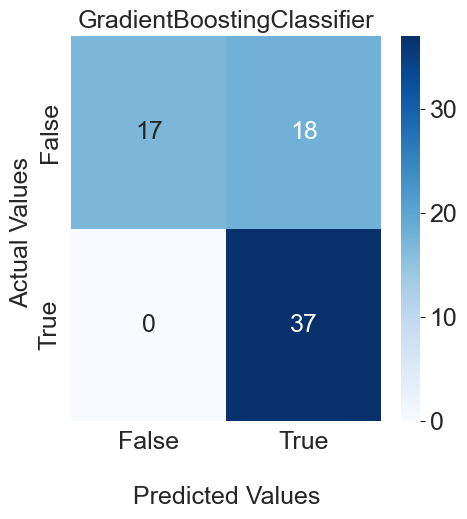

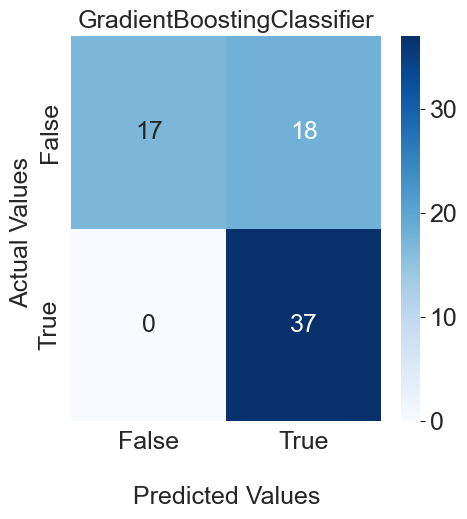

In [82]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.rcParams.update({'font.size': 18})

ax = sns.heatmap(result, annot=True, cmap='Blues',ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title(clf.__class__.__name__,fontsize=18);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### RandomForestClassifier


In [83]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

print('****Results****')

train_predictions = clf.predict(x_test)
#print(y_test, train_predictions)

acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
    
train_predictions = clf.predict_proba(x_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

log_entry = pd.DataFrame([[clf.__class__.__name__, acc*100, ll]], columns=log_cols)
log = pd.concat([log_entry,log])

****Results****
Accuracy: 90.2778%
Log Loss: 0.22103969598893075
****Results****
Accuracy: 90.2778%
Log Loss: 0.22103969598893075


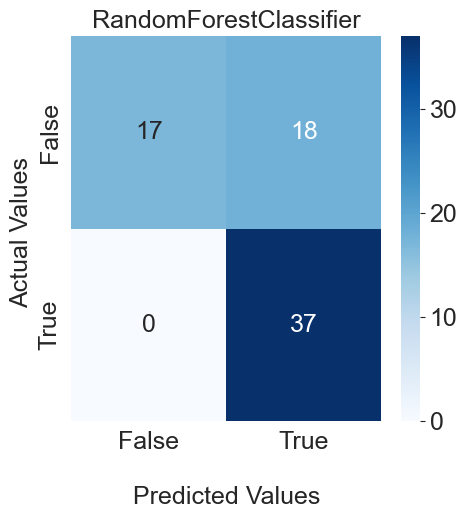

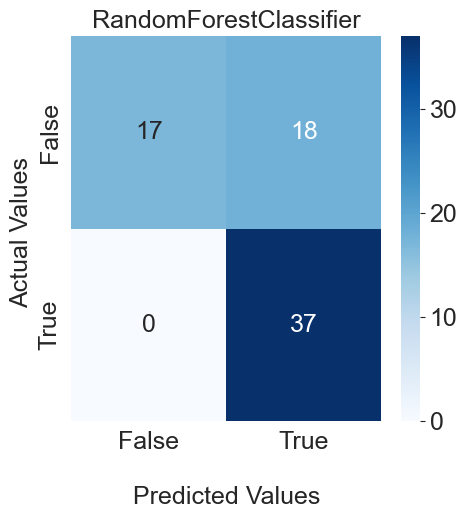

In [84]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.rcParams.update({'font.size': 18})

ax = sns.heatmap(result, annot=True, cmap='Blues',ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title(clf.__class__.__name__,fontsize=18);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### AdaBoostClassifier

In [85]:
clf = AdaBoostClassifier()
clf.fit(x_train, y_train)

print('****Results****')

train_predictions = clf.predict(x_test)
#print(y_test, train_predictions)

acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
    
train_predictions = clf.predict_proba(x_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

log_entry = pd.DataFrame([[clf.__class__.__name__, acc*100, ll]], columns=log_cols)
log = pd.concat([log_entry,log])

****Results****
Accuracy: 87.5000%
Log Loss: 0.5509768391291642
****Results****
Accuracy: 87.5000%
Log Loss: 0.5509768391291642


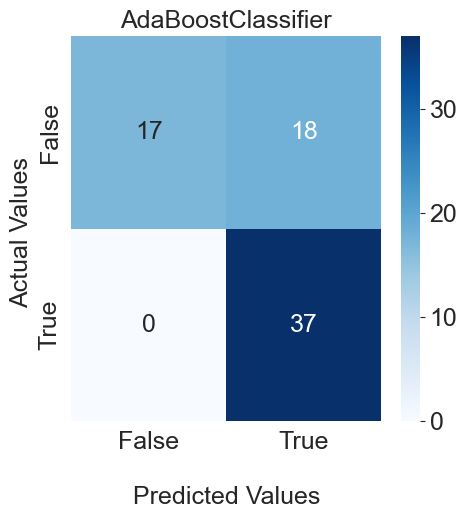

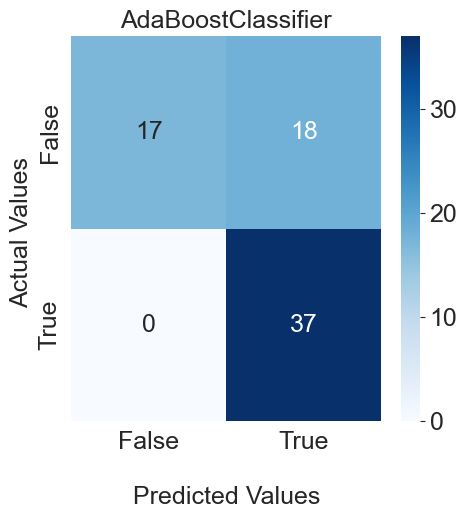

In [86]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.rcParams.update({'font.size': 18})

ax = sns.heatmap(result, annot=True, cmap='Blues',ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title(clf.__class__.__name__,fontsize=18);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### DecisionTreeClassifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

print('****Results****')

train_predictions = clf.predict(x_test)
#print(y_test, train_predictions)

acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
    
train_predictions = clf.predict_proba(x_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

log_entry = pd.DataFrame([[clf.__class__.__name__, acc*100, ll]], columns=log_cols)
log = pd.concat([log_entry,log])

****Results****
Accuracy: 90.2778%
Log Loss: 3.3579365939496504
****Results****
Accuracy: 90.2778%
Log Loss: 3.3579365939496504


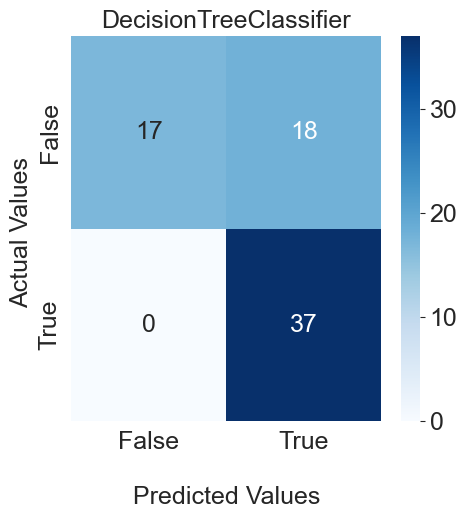

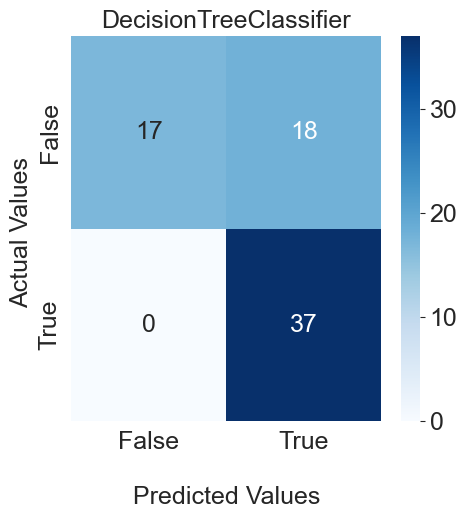

In [88]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.rcParams.update({'font.size': 18})

ax = sns.heatmap(result, annot=True, cmap='Blues',ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title(clf.__class__.__name__,fontsize=18);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### SVC

In [89]:
from sklearn.svm import SVC, LinearSVC, NuSVC
clf = SVC(kernel="rbf", C=0.025, probability=True)
clf.fit(x_train, y_train)

print('****Results****')

train_predictions = clf.predict(x_test)
#print(y_test, train_predictions)

acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
    
train_predictions = clf.predict_proba(x_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

log_entry = pd.DataFrame([[clf.__class__.__name__, acc*100, ll]], columns=log_cols)
log = pd.concat([log_entry,log])

****Results****
Accuracy: 48.6111%
Log Loss: 0.6977206205031767
****Results****
Accuracy: 48.6111%
Log Loss: 0.6977206205031767


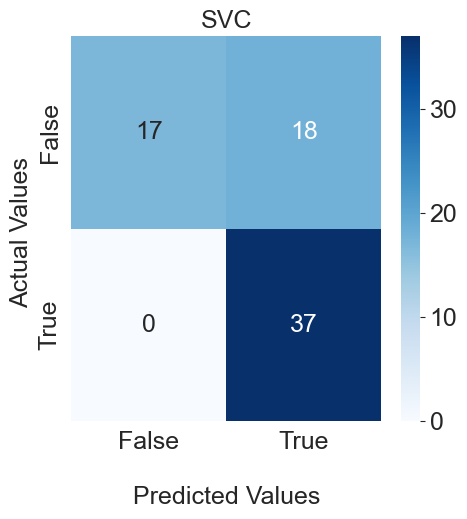

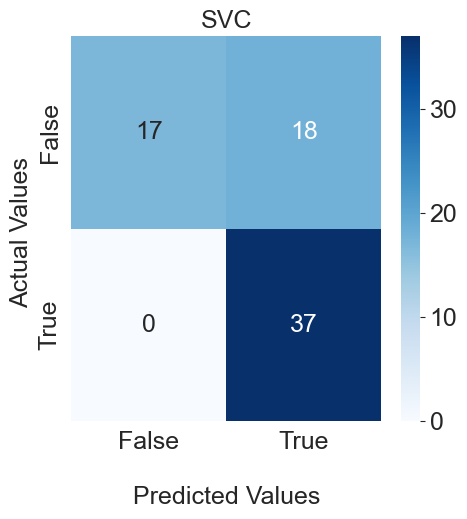

In [90]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.rcParams.update({'font.size': 18})

ax = sns.heatmap(result, annot=True, cmap='Blues',ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title(clf.__class__.__name__,fontsize=18);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### NuSVC

In [91]:
from sklearn.svm import SVC, NuSVC
clf = NuSVC(probability=True)
clf.fit(x_train, y_train)

print('****Results****')

train_predictions = clf.predict(x_test)
#print(y_test, train_predictions)

acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
    
train_predictions = clf.predict_proba(x_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

log_entry = pd.DataFrame([[clf.__class__.__name__, acc*100, ll]], columns=log_cols)
log = pd.concat([log_entry,log])

****Results****
Accuracy: 73.6111%
Log Loss: 0.4512207327407763
****Results****
Accuracy: 73.6111%
Log Loss: 0.4512207327407763


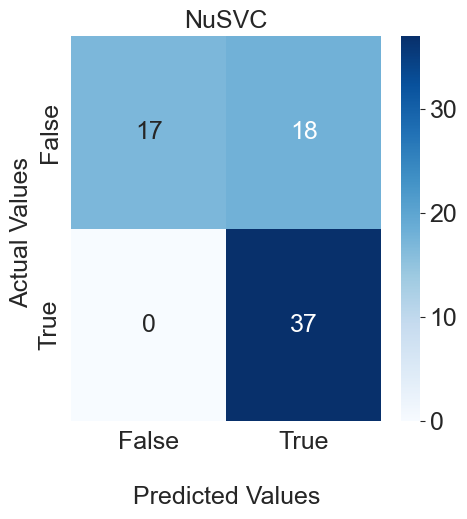

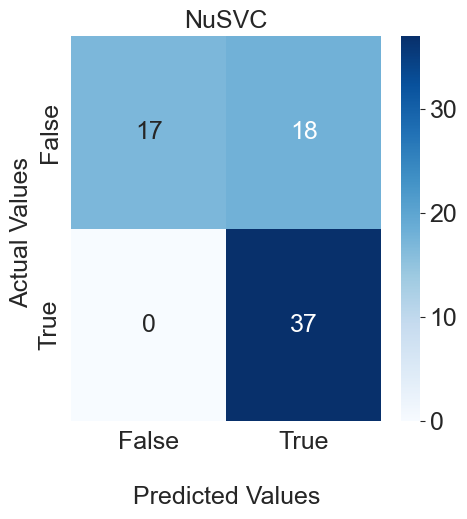

In [92]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.rcParams.update({'font.size': 18})

ax = sns.heatmap(result, annot=True, cmap='Blues',ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title(clf.__class__.__name__,fontsize=18);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### LinearDiscriminantAnalysis


In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)

print('****Results****')

train_predictions = clf.predict(x_test)
#print(y_test, train_predictions)

acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
    
train_predictions = clf.predict_proba(x_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

log_entry = pd.DataFrame([[clf.__class__.__name__, acc*100, ll]], columns=log_cols)
log = pd.concat([log_entry,log])

****Results****
Accuracy: 52.7778%
Log Loss: 0.6586780569848548
****Results****
Accuracy: 52.7778%
Log Loss: 0.6586780569848548


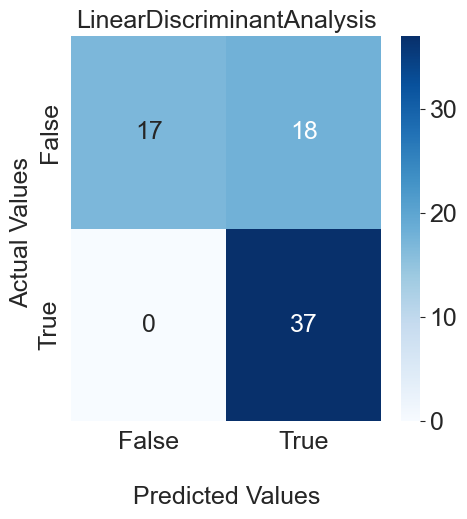

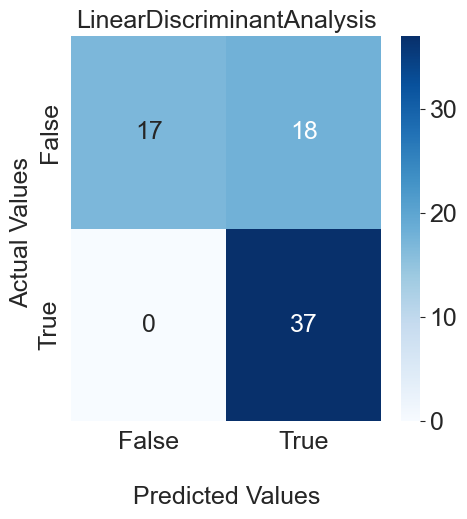

In [94]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.rcParams.update({'font.size': 18})

ax = sns.heatmap(result, annot=True, cmap='Blues',ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title(clf.__class__.__name__,fontsize=18);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### GaussianNB


In [95]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)

print('****Results****')

train_predictions = clf.predict(x_test)
#print(y_test, train_predictions)

acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
    
train_predictions = clf.predict_proba(x_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

log_entry = pd.DataFrame([[clf.__class__.__name__, acc*100, ll]], columns=log_cols)
log = pd.concat([log_entry,log])

****Results****
Accuracy: 80.5556%
Log Loss: 1.0510164656689729
****Results****
Accuracy: 80.5556%
Log Loss: 1.0510164656689729


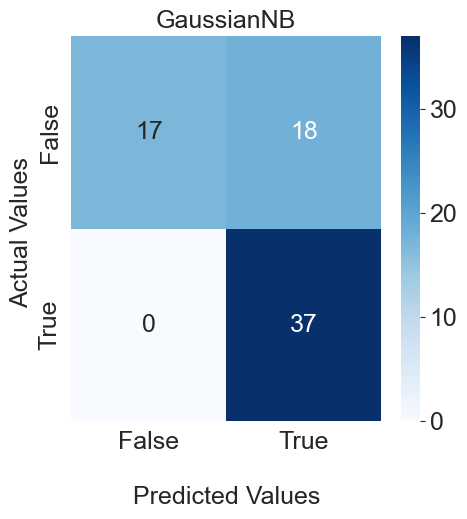

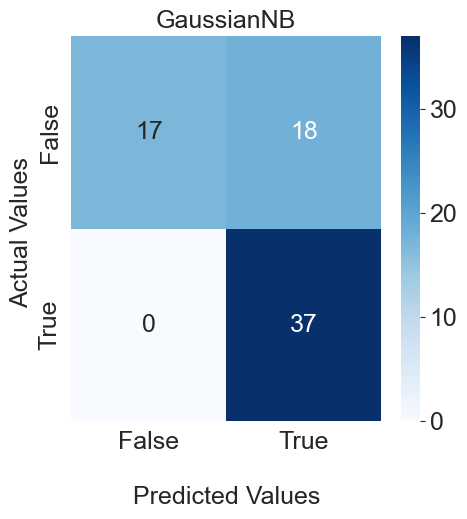

In [96]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.rcParams.update({'font.size': 18})

ax = sns.heatmap(result, annot=True, cmap='Blues',ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title(clf.__class__.__name__,fontsize=18);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Logistic Regression

In [97]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(max_iter=50)
clf.fit(x_train, y_train)

print('****Results****')

train_predictions = clf.predict(x_test)
#print(y_test, train_predictions)

acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
    
train_predictions = clf.predict_proba(x_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

log_entry = pd.DataFrame([[clf.__class__.__name__, acc*100, ll]], columns=log_cols)
log = pd.concat([log_entry,log])

****Results****
Accuracy: 75.0000%
Log Loss: 0.4690238071364262
****Results****
Accuracy: 75.0000%
Log Loss: 0.4690238071364262


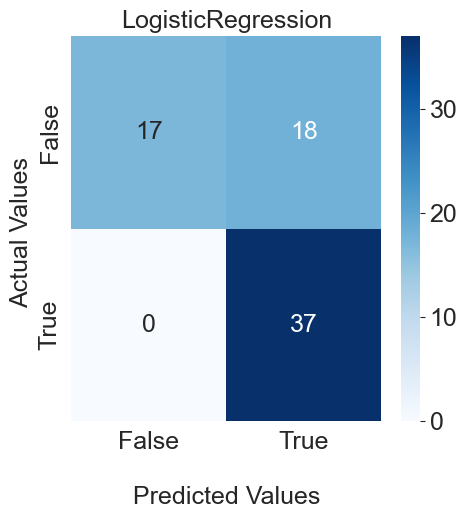

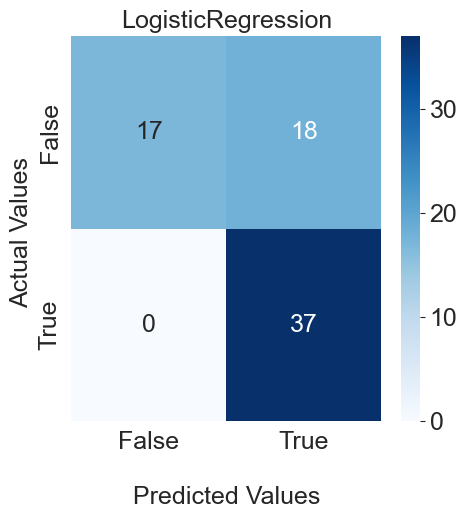

In [98]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.rcParams.update({'font.size': 18})

ax = sns.heatmap(result, annot=True, cmap='Blues',ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title(clf.__class__.__name__,fontsize=18);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### MLPClassifier

In [99]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=3000)
clf.fit(x_train, y_train)

print('****Results****')

train_predictions = clf.predict(x_test)
#print(y_test, train_predictions)

acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
    
train_predictions = clf.predict_proba(x_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

log_entry = pd.DataFrame([[clf.__class__.__name__, acc*100, ll]], columns=log_cols)
log = pd.concat([log_entry,log])

****Results****
Accuracy: 80.5556%
Log Loss: 0.3880491323119554
****Results****
Accuracy: 80.5556%
Log Loss: 0.3880491323119554


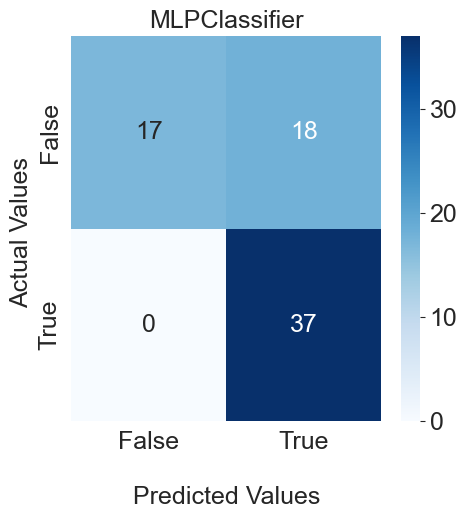

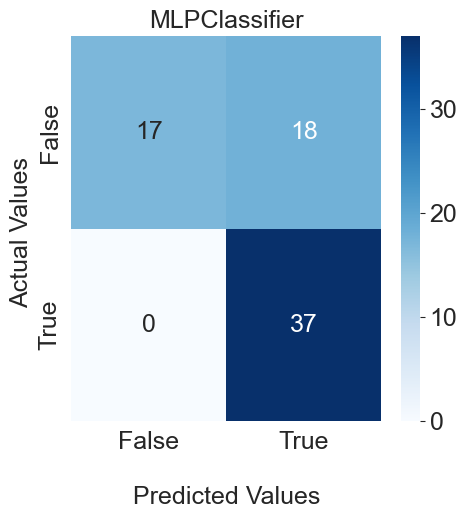

In [100]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.rcParams.update({'font.size': 18})

ax = sns.heatmap(result, annot=True, cmap='Blues',ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title(clf.__class__.__name__,fontsize=18);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### BaggingClassifier

In [101]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier()
clf.fit(x_train, y_train)

print('****Results****')

train_predictions = clf.predict(x_test)
#print(y_test, train_predictions)

acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
    
train_predictions = clf.predict_proba(x_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

log_entry = pd.DataFrame([[clf.__class__.__name__, acc*100, ll]], columns=log_cols)
log = pd.concat([log_entry,log])

****Results****
Accuracy: 88.8889%
Log Loss: 0.6773918777250905
****Results****
Accuracy: 88.8889%
Log Loss: 0.6773918777250905


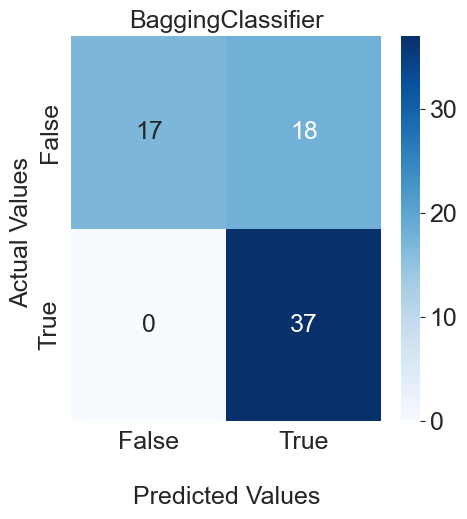

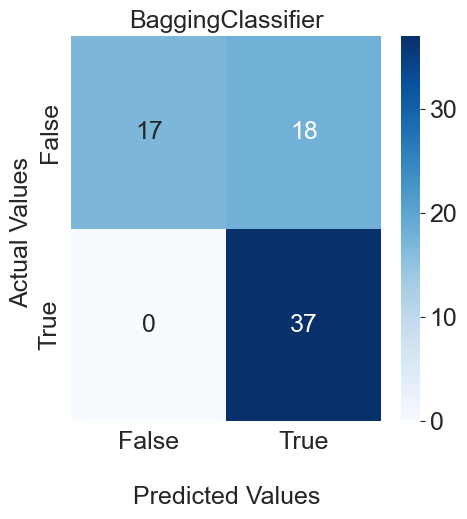

In [102]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.rcParams.update({'font.size': 18})

ax = sns.heatmap(result, annot=True, cmap='Blues',ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title(clf.__class__.__name__,fontsize=18);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### HistGradientBoostingClassifier

In [103]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier()
clf.fit(x_train, y_train)

print('****Results****')

train_predictions = clf.predict(x_test)
#print(y_test, train_predictions)

acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
    
train_predictions = clf.predict_proba(x_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

log_entry = pd.DataFrame([[clf.__class__.__name__, acc*100, ll]], columns=log_cols)
log = pd.concat([log_entry,log])

****Results****
Accuracy: 87.5000%
Log Loss: 0.20087857228560985
****Results****
Accuracy: 87.5000%
Log Loss: 0.20087857228560985


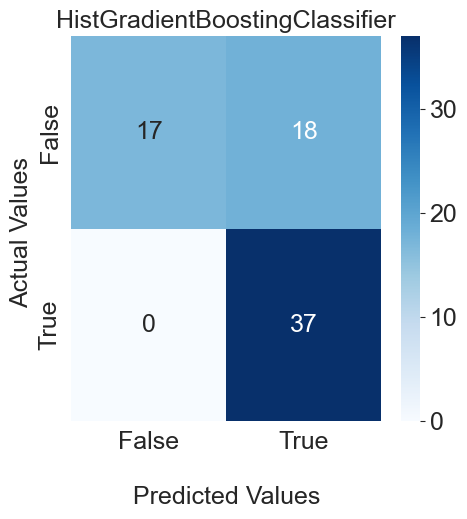

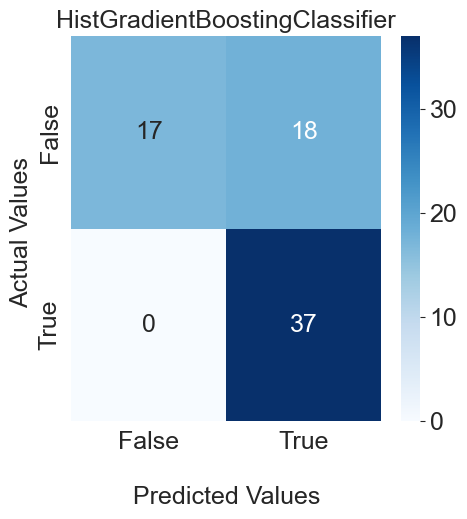

In [104]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.rcParams.update({'font.size': 18})

ax = sns.heatmap(result, annot=True, cmap='Blues',ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title(clf.__class__.__name__,fontsize=18);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### ExtraTreesClassifier

In [105]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(x_train, y_train)

print('****Results****')

train_predictions = clf.predict(x_test)
#print(y_test, train_predictions)

acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
    
train_predictions = clf.predict_proba(x_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

log_entry = pd.DataFrame([[clf.__class__.__name__, acc*100, ll]], columns=log_cols)
log = pd.concat([log_entry,log])

****Results****
Accuracy: 90.2778%
Log Loss: 2.0190124116453294
****Results****
Accuracy: 90.2778%
Log Loss: 2.0190124116453294


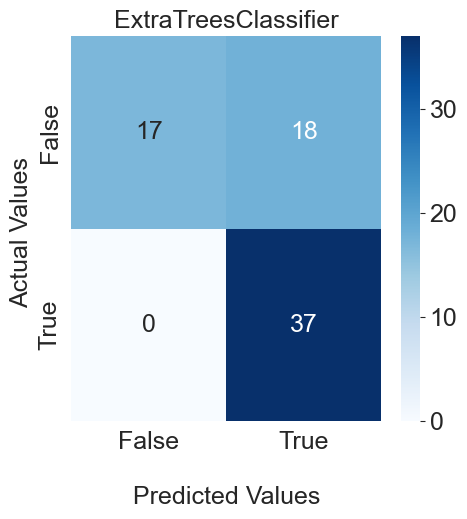

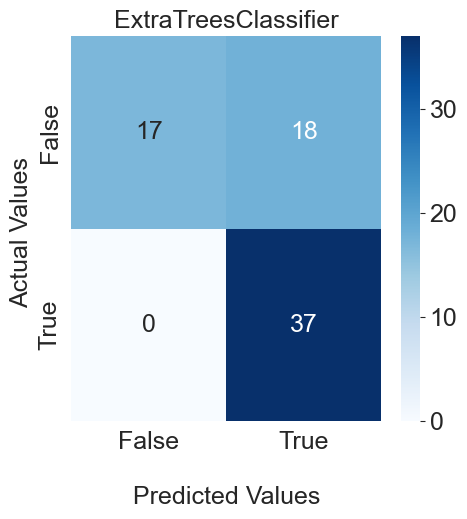

In [106]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.rcParams.update({'font.size': 18})

ax = sns.heatmap(result, annot=True, cmap='Blues',ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title(clf.__class__.__name__,fontsize=18);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Comparação entre classificadores

In [107]:
log.to_csv('log_Gender.csv')
log

,Classifier,Accuracy,Log Loss
0,ExtraTreesClassifier,90.277778,2.019012
0,HistGradientBoostingClassifier,87.500000,0.200879
0,BaggingClassifier,88.888889,0.677392
0,MLPClassifier,80.555556,0.388049
0,LogisticRegression,75.000000,0.469024
0,GaussianNB,80.555556,1.051016
0,LinearDiscriminantAnalysis,52.777778,0.658678
0,NuSVC,73.611111,0.451221
0,SVC,48.611111,0.697721
0,DecisionTreeClassifier,90.277778,3.357937


,Classifier,Accuracy,Log Loss
0,ExtraTreesClassifier,90.277778,2.019012
0,HistGradientBoostingClassifier,87.500000,0.200879
0,BaggingClassifier,88.888889,0.677392
0,MLPClassifier,80.555556,0.388049
0,LogisticRegression,75.000000,0.469024
0,GaussianNB,80.555556,1.051016
0,LinearDiscriminantAnalysis,52.777778,0.658678
0,NuSVC,73.611111,0.451221
0,SVC,48.611111,0.697721
0,DecisionTreeClassifier,90.277778,3.357937


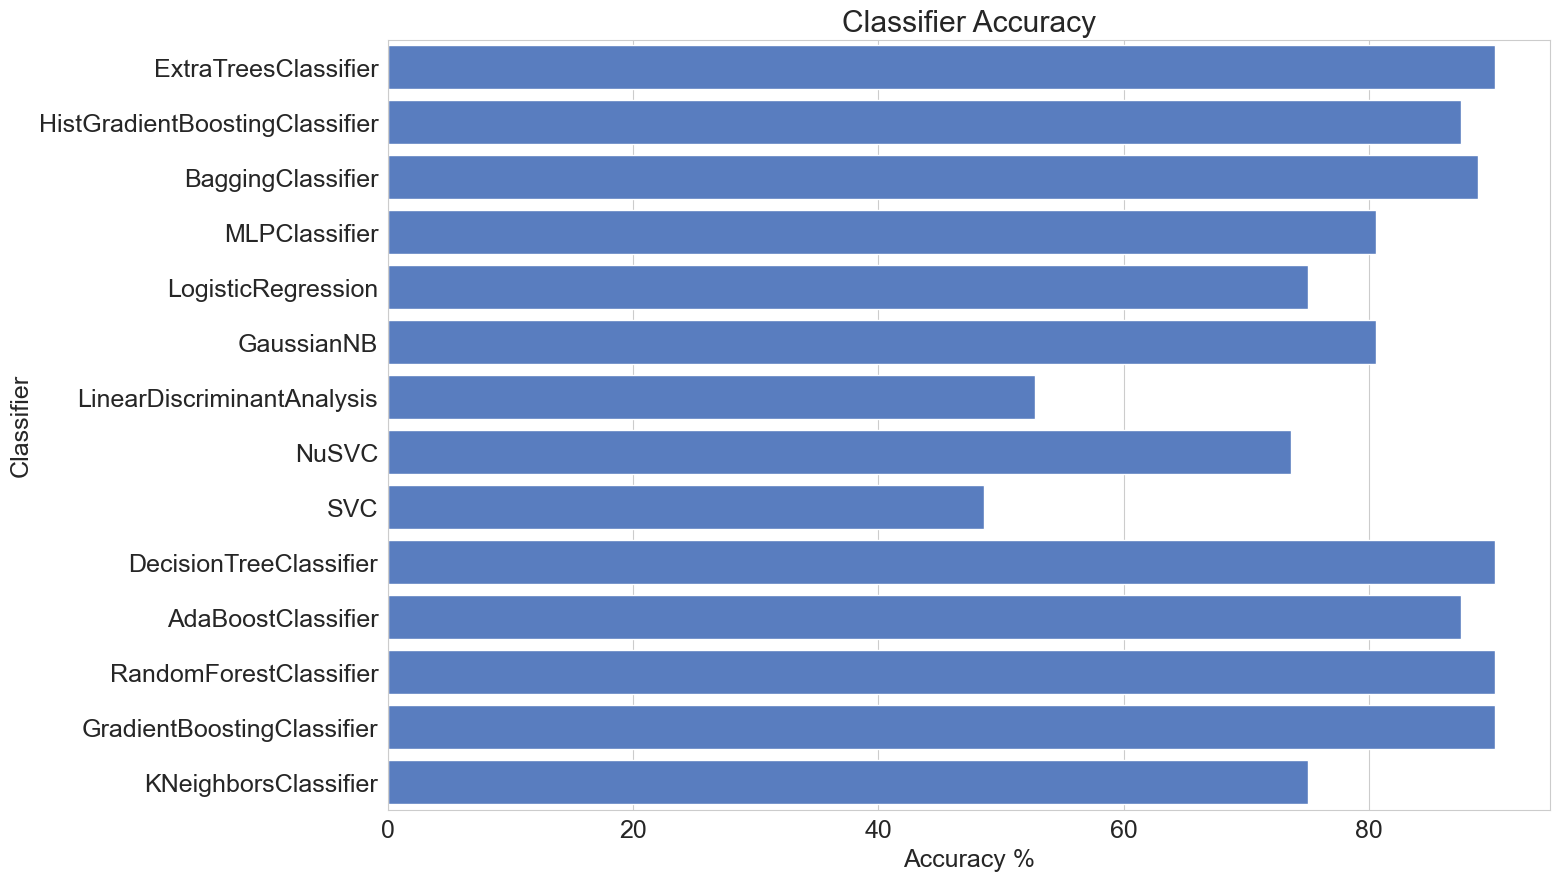

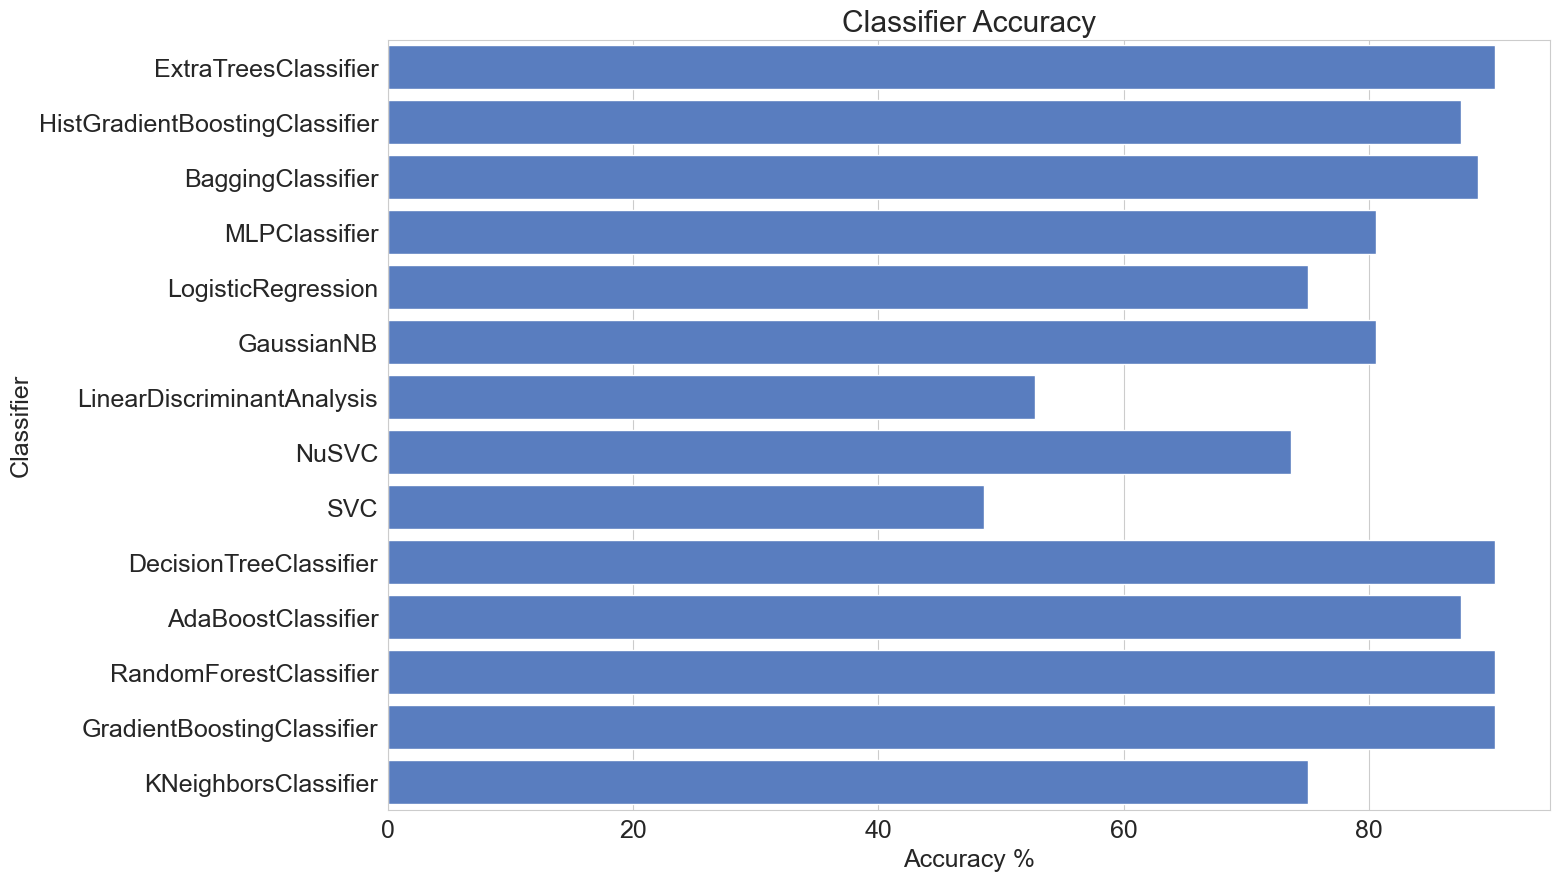

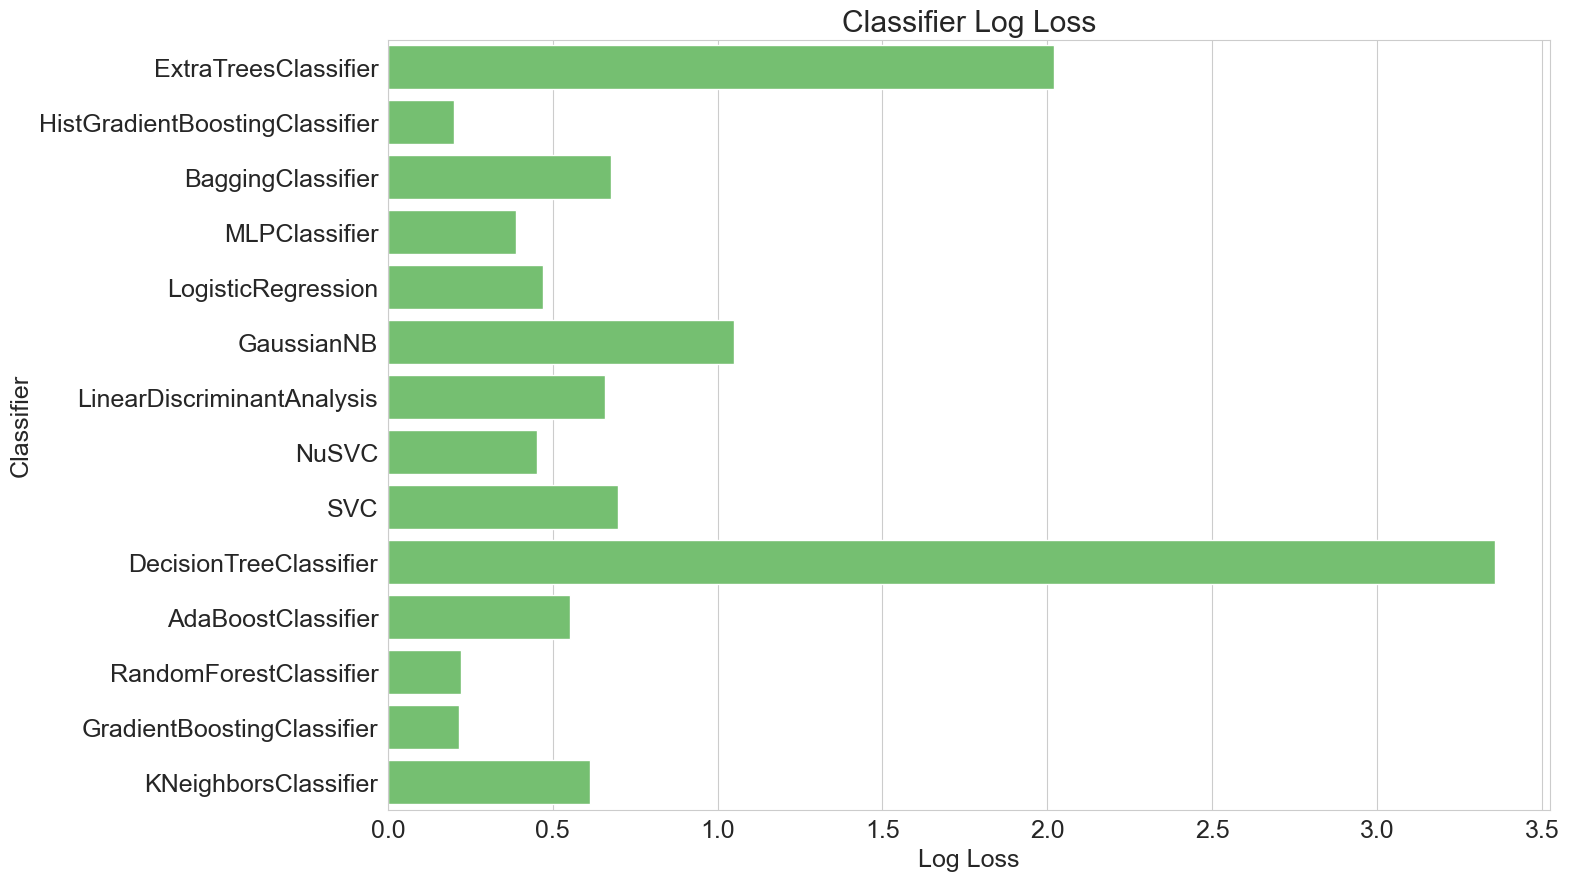

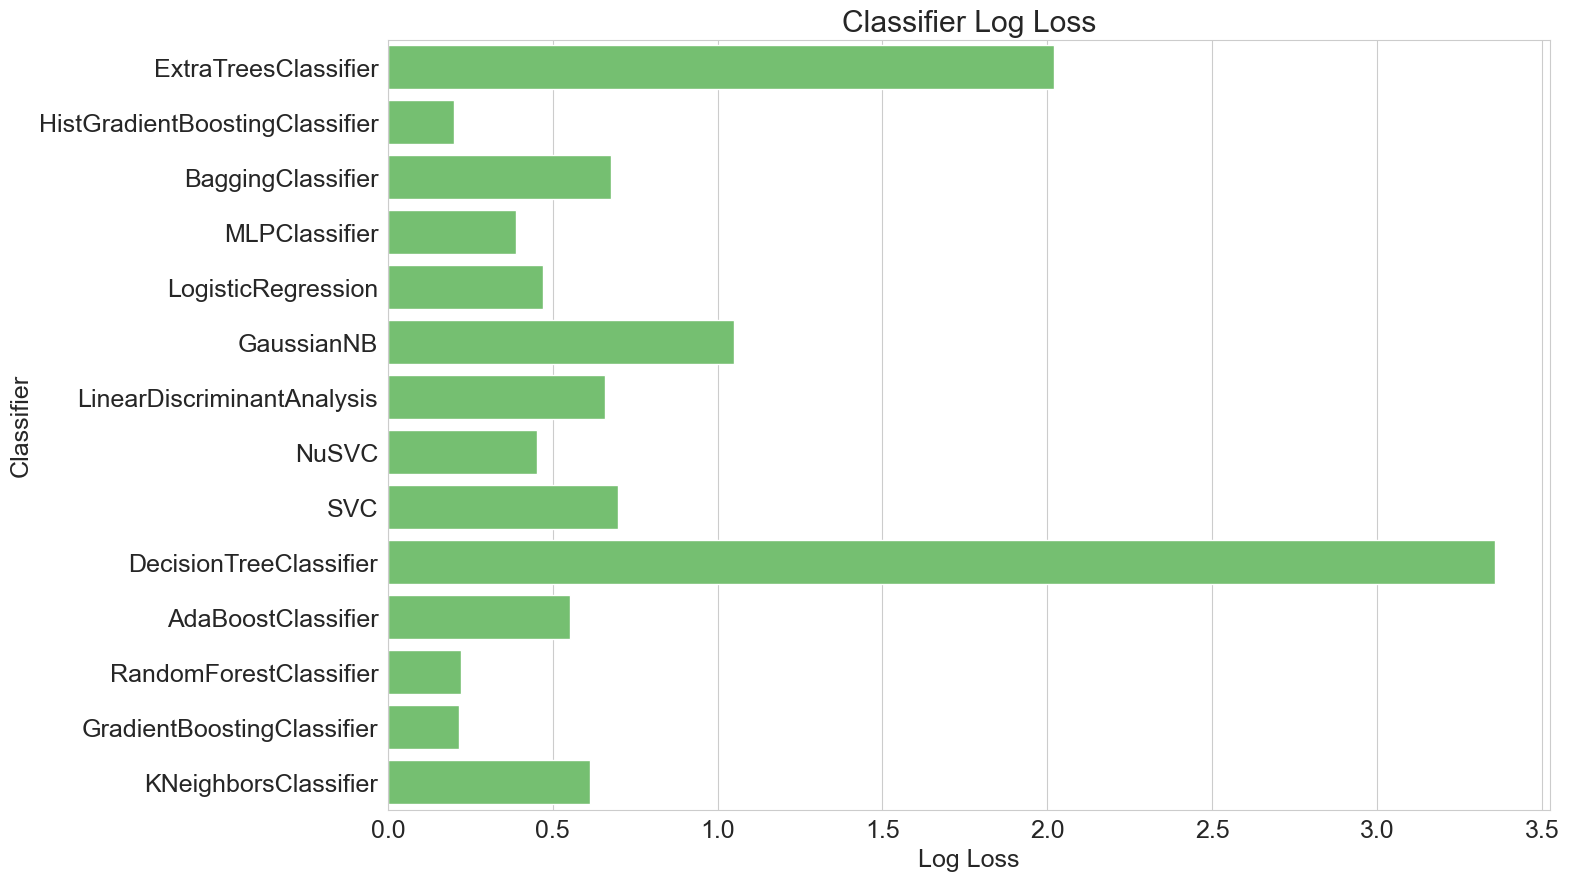

In [108]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()